In [1]:
import os , sys
datapath   = os.path.join('../../') #since this file is 2 dir down from the data it's ../../
print('datapath is set to %s'%datapath)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
sys.path.append('../')
#from Loobos_Toolbox import Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
#from Loobos_Toolbox_Dendro_Grwater

datapath is set to ../../


In [2]:
#my own functions
from Loobos_Toolbox_Dendro_Grwater import Read_Dendrometers,notmatch

## Import Dendrometer data

### populate dataframes

In [3]:
## function to import all dendro data


def import_band_dendro(path):
    df = pd.read_csv(path,sep=",",index_col=False)
    df['datetime']=pd.to_datetime(df['groeiseizoen'], format= '%m-%d %H:%M')
    df.index = df['datetime']
    new_index=pd.to_datetime(df.index.strftime(date_format='1990-%m-%d %H:%M')) #for certain files, date column randomly has the year alternate between 2023, 1930, etc. Correct this by setting it all to 1990
    df.set_index(new_index,inplace=True)
    return df

def import_band_dendro_O3(path):
    df = pd.read_csv(path,sep=",",index_col=False)
    df['datetime']=pd.to_datetime(df['groeiseizoen'], format= '%m-%d-%Y %H:%M') #for whatever reason this file's timecodes are different it's also wrong, so just store it but dont bother using it.
    df.index=pd.date_range(start='1990-04-01 00:00', end='1990-10-01 00:00' , freq='H') #create a whole new index
    df.indexname='datetime'
    return df

def import_band_dendro_I5fix(path):
    df = pd.read_csv(path,sep=",",index_col=False)
    df['datetime']=pd.to_datetime(df['groeiseizoen'], format= '%m/%d/%Y %H:%M') #for whatever reason this file's timecodes are different it's also wrong, so just store it but dont bother using it.
    df.drop(columns='jr2015',inplace=True)
    df.rename(columns={'jr2015_fix':'jr2015'},inplace=True)
    df.index=pd.date_range(start='1990-04-01 00:00', end='1990-10-01 00:00' , freq='H') #create a whole new index
    df.indexname='datetime'
    return df

def import_point_dendro(path):
    df_r=pd.read_csv(path,sep=",",index_col=0)
    df_r.index=pd.to_datetime(df_r.index, format= '%Y-%m-%d %H:%M:%S')
    return df_r

In [4]:
#df_dendro_I5=import_band_dendro(datapath+'Loobos_dendrometers\I5.csv')
df_dendro_I5=import_band_dendro_I5fix(datapath+'Loobos_dendrometers\I5_fix.csv')
df_dendro_K7=import_band_dendro(datapath+'Loobos_dendrometers\K7.csv')
df_dendro_K8=import_band_dendro(datapath+'Loobos_dendrometers\K8.csv')
df_dendro_K9=import_band_dendro(datapath+'Loobos_dendrometers\K9.csv')
df_dendro_O3=import_band_dendro_O3(datapath+'Loobos_dendrometers\O3.csv')

In [5]:
#point (radial) dendrometers (only 2022)
df_dendro_I5r=import_point_dendro(datapath+'Loobos_dendrometers\I5_point.csv')
df_dendro_K7r=import_point_dendro(datapath+'Loobos_dendrometers\K7_point.csv')
df_dendro_K8r=import_point_dendro(datapath+'Loobos_dendrometers\K8_point.csv')
df_dendro_K9r=import_point_dendro(datapath+'Loobos_dendrometers\K9_point.csv')
df_dendro_O3r=import_point_dendro(datapath+'Loobos_dendrometers\O3_point.csv')

### visual check dataframes

#### band dendro

In [121]:
df_dendro_I5

groeiseizoen    jr2008   jr2010   jr2011   jr2012  \
datetime                                                                
1990-04-01 00:00:00  04-01 00:00  0.000000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00  04-01 01:00 -0.000969  0.00097  0.00581  0.00097   
1990-04-01 02:00:00  04-01 02:00 -0.000969  0.01937  0.02034  0.00387   
1990-04-01 03:00:00  04-01 03:00 -0.000969  0.02131  0.03002  0.00484   
1990-04-01 04:00:00  04-01 04:00  0.000968  0.02034  0.03583  0.00581   
...                          ...       ...      ...      ...      ...   
1990-09-30 20:00:00  09-30 20:00  4.765185  7.83966      NaN  7.96167   
1990-09-30 21:00:00  09-30 21:00  4.804895  7.85225      NaN  7.96070   
1990-09-30 22:00:00  09-30 22:00  4.884295  7.86000      NaN  7.96264   
1990-09-30 23:00:00  09-30 23:00  4.889135  7.87646      NaN  7.96361   
1990-10-01 00:00:00  10-01 00:00  4.903665  7.89195      NaN  7.96457   

                      jr2013   jr2014   jr2015   jr2016   jr2017   jr2018  \
datetime                                                                    
1990-04-01 00:00:00  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00  0.00193  0.00194  0.00872 -0.00484  0.00290  0.00290   
1990-04-01 02:00:00  0.00290  0.00291  0.00388 -0.00291  0.00581  0.00871   
1990-04-01 03:00:00  0.00290  0.00291  0.00291 -0.00291  0.00290  0.01451   
1990-04-01 04:00:00  0.00193  0.00388  0.01646 -0.00291 -0.00097  0.02614   
...                      ...      ...      ...      ...      ...      ...   
1990-09-30 20:00:00  6.22931  7.47055  4.49737  4.97047  5.45640  3.08705   
1990-09-30 21:00:00  6.22738  7.47442  4.49544  4.97338  5.46221  3.08609   
1990-09-30 22:00:00  6.22834  7.48023  4.49544  4.97435  5.45931  3.08899   
1990-09-30 23:00:00  6.22834  7.48314  4.49641  4.97629  5.45446  3.08899   
1990-10-01 00:00:00  6.22834  7.48314  4.49447  4.97725  5.45156  3.09093   

                      jr2019   jr2020   jr2021   jr2022            datetime  
datetime                                                                     
1990-04-01 00:00:00  0.00000  0.00000  0.00000  0.00000 1900-04-01 00:00:00  
1990-04-01 01:00:00 -0.00097 -0.00097  0.00000  0.05809 1900-04-01 01:00:00  
1990-04-01 02:00:00 -0.00387 -0.00484  0.00194  0.08715 1900-04-01 02:00:00  
1990-04-01 03:00:00 -0.00774 -0.00194  0.00290  0.11523 1900-04-01 03:00:00  
1990-04-01 04:00:00 -0.00968  0.00581  0.00484  0.24692 1900-04-01 04:00:00  
...                      ...      ...      ...      ...                 ...  
1990-09-30 20:00:00  7.68086  8.54849  8.39065  6.88198 1900-09-30 20:00:00  
1990-09-30 21:00:00  7.68086  8.55042  8.39161  6.88488 1900-09-30 21:00:00  
1990-09-30 22:00:00  7.68183  8.55235  8.39065  6.88678 1900-09-30 22:00:00  
1990-09-30 23:00:00  7.68086  8.55623  8.38871  6.88488 1900-09-30 23:00:00  
1990-10-01 00:00:00  7.68086  8.55914  8.38774  6.88878 1900-10-01 00:00:00  

[4393 rows x 16 columns]

In [122]:
df_dendro_K7

groeiseizoen    jr2008    jr2009   jr2010   jr2012  \
datetime                                                                 
1990-04-01 00:00:00  04-01 00:00  0.000000  0.000000  0.00000  0.00000   
1990-04-01 01:00:00  04-01 01:00  0.000000  0.000000  0.00484  0.00000   
1990-04-01 02:00:00  04-01 02:00  0.000000 -0.000968  0.00968 -0.00097   
1990-04-01 03:00:00  04-01 03:00 -0.001937 -0.001936  0.00871 -0.00097   
1990-04-01 04:00:00  04-01 04:00 -0.000968 -0.000968  0.00968 -0.00097   
...                          ...       ...       ...      ...      ...   
1990-09-30 20:00:00  09-30 20:00  1.295636  7.511399  9.91383  4.03894   
1990-09-30 21:00:00  09-30 21:00  1.314034  7.515269  9.91577  4.04862   
1990-09-30 22:00:00  09-30 22:00  1.344053  7.514299  9.91674  4.05443   
1990-09-30 23:00:00  09-30 23:00  1.359546  7.517209  9.91965  4.05927   
1990-10-01 00:00:00  10-01 00:00  1.380850  7.509459  9.91965  4.06121   

                      jr2013   jr2015   jr2018            datetime  
datetime                                                            
1990-04-01 00:00:00  0.00000  0.00000  0.00000 1900-04-01 00:00:00  
1990-04-01 01:00:00  0.00097 -0.00097  0.00484 1900-04-01 01:00:00  
1990-04-01 02:00:00  0.00000  0.00000  0.00871 1900-04-01 02:00:00  
1990-04-01 03:00:00  0.00097 -0.00291  0.01259 1900-04-01 03:00:00  
1990-04-01 04:00:00  0.00000 -0.00097  0.01452 1900-04-01 04:00:00  
...                      ...      ...      ...                 ...  
1990-09-30 20:00:00  5.29681      NaN  1.31306 1900-09-30 20:00:00  
1990-09-30 21:00:00  5.29584      NaN  1.31016 1900-09-30 21:00:00  
1990-09-30 22:00:00  5.29875      NaN  1.31209 1900-09-30 22:00:00  
1990-09-30 23:00:00  5.29778      NaN  1.31209 1900-09-30 23:00:00  
1990-10-01 00:00:00  5.29875      NaN  1.31209 1900-10-01 00:00:00  

[4393 rows x 9 columns]

In [118]:
df_dendro_K8

groeiseizoen    jr2008    jr2009    jr2010    jr2012  \
datetime                                                                   
1990-04-01 00:00:00  04-01 00:00  0.000000   0.00000   0.00000   0.00000   
1990-04-01 01:00:00  04-01 01:00  0.000000   0.00097   0.00484  -0.00097   
1990-04-01 02:00:00  04-01 02:00  0.000000   0.00194   0.00872  -0.00097   
1990-04-01 03:00:00  04-01 03:00  0.000000   0.00291   0.01550   0.00097   
1990-04-01 04:00:00  04-01 04:00  0.000968   0.00484   0.01743   0.00291   
...                          ...       ...       ...       ...       ...   
1990-09-30 20:00:00  09-30 20:00  8.840919  13.16455  14.58897  10.03004   
1990-09-30 21:00:00  09-30 21:00  8.855449  13.16649  14.59382  10.03488   
1990-09-30 22:00:00  09-30 22:00  8.908709  13.16358  14.59866  10.03779   
1990-09-30 23:00:00  09-30 23:00  8.946469  13.16455  14.59963  10.03973   
1990-10-01 00:00:00  10-01 00:00  8.982299  13.16842  14.60253  10.04457   

                      jr2013   jr2015   jr2018            datetime  
datetime                                                            
1990-04-01 00:00:00  0.00000  0.00000  0.00000 1900-04-01 00:00:00  
1990-04-01 01:00:00  0.00290 -0.00484  0.00871 1900-04-01 01:00:00  
1990-04-01 02:00:00  0.00580 -0.00678  0.01453 1900-04-01 02:00:00  
1990-04-01 03:00:00  0.00484 -0.00678  0.01936 1900-04-01 03:00:00  
1990-04-01 04:00:00  0.00580 -0.00581  0.02808 1900-04-01 04:00:00  
...                      ...      ...      ...                 ...  
1990-09-30 20:00:00  9.18757      NaN  1.68878 1900-09-30 20:00:00  
1990-09-30 21:00:00  9.19048      NaN  1.68684 1900-09-30 21:00:00  
1990-09-30 22:00:00  9.19145      NaN  1.69072 1900-09-30 22:00:00  
1990-09-30 23:00:00  9.19145      NaN  1.69653 1900-09-30 23:00:00  
1990-10-01 00:00:00  9.19533      NaN  1.69846 1900-10-01 00:00:00  

[4393 rows x 9 columns]

In [119]:
df_dendro_K9

groeiseizoen    jr2009   jr2010   jr2011   jr2015  \
datetime                                                                
1990-04-01 00:00:00  04-01 00:00  0.000000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00  04-01 01:00  0.000000  0.01937  0.00581  0.00000   
1990-04-01 02:00:00  04-01 02:00  0.001936  0.02905  0.02034  0.00194   
1990-04-01 03:00:00  04-01 03:00  0.002904  0.03777  0.03002 -0.00581   
1990-04-01 04:00:00  04-01 04:00  0.004841  0.04842  0.03583  0.00581   
...                          ...       ...      ...      ...      ...   
1990-09-30 20:00:00  09-30 20:00  3.612865  6.88972      NaN      NaN   
1990-09-30 21:00:00  09-30 21:00  3.615775  6.89263      NaN      NaN   
1990-09-30 22:00:00  09-30 22:00  3.618675  6.89941      NaN      NaN   
1990-09-30 23:00:00  09-30 23:00  3.625455  6.90425      NaN      NaN   
1990-10-01 00:00:00  10-01 00:00  3.629325  6.90619      NaN      NaN   

                      jr2018            datetime  
datetime                                          
1990-04-01 00:00:00  0.00000 1900-04-01 00:00:00  
1990-04-01 01:00:00  0.00097 1900-04-01 01:00:00  
1990-04-01 02:00:00  0.00000 1900-04-01 02:00:00  
1990-04-01 03:00:00  0.00000 1900-04-01 03:00:00  
1990-04-01 04:00:00  0.00000 1900-04-01 04:00:00  
...                      ...                 ...  
1990-09-30 20:00:00  0.12104 1900-09-30 20:00:00  
1990-09-30 21:00:00  0.12298 1900-09-30 21:00:00  
1990-09-30 22:00:00  0.12298 1900-09-30 22:00:00  
1990-09-30 23:00:00  0.12298 1900-09-30 23:00:00  
1990-10-01 00:00:00  0.12298 1900-10-01 00:00:00  

[4393 rows x 7 columns]

In [155]:
df_dendro_O3

groeiseizoen   jr2008   jr2009    jr2010   jr2012  \
datetime                                                                   
1990-04-01 00:00:00   4-1-2023 0:00  0.00000  0.00000   0.00000  0.00000   
1990-04-01 01:00:00   4-1-2023 1:00  0.00000  0.00000   0.00194 -0.00097   
1990-04-01 02:00:00   4-1-2023 2:00 -0.00097 -0.00097   0.00388 -0.00097   
1990-04-01 03:00:00   4-1-2023 3:00 -0.00097  0.00000   0.00484  0.00097   
1990-04-01 04:00:00   4-1-2023 4:00  0.00000  0.00097   0.00872  0.00097   
...                             ...      ...      ...       ...      ...   
1990-01-09 20:00:00  1-9-1930 20:00  5.71126  9.44613  11.53968  6.15572   
1990-01-09 21:00:00  1-9-1930 21:00  5.73062  9.44129  11.54452  6.16056   
1990-01-09 22:00:00  1-9-1930 22:00  5.75096  9.43838  11.55324  6.16734   
1990-01-09 23:00:00  1-9-1930 23:00  5.75774  9.44032  11.56583  6.17606   
1990-10-01 00:00:00  10-1-2023 0:00  5.77226  9.44226  11.56776  6.17993   

                      jr2013   jr2014   jr2015   jr2016   jr2017   jr2018  \
datetime                                                                    
1990-04-01 00:00:00  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00  0.00291 -0.00097 -0.03486 -0.00193  0.00000  0.02228   
1990-04-01 02:00:00  0.00388  0.00000 -0.04551 -0.00193  0.00290  0.04552   
1990-04-01 03:00:00  0.00485  0.00484 -0.02324 -0.00097  0.00678  0.06682   
1990-04-01 04:00:00  0.00678  0.00581  0.00387  0.00194  0.01065  0.09200   
...                      ...      ...      ...      ...      ...      ...   
1990-01-09 20:00:00  6.30873  2.52508  3.70098  3.15000  2.15270 -0.51128   
1990-01-09 21:00:00  6.30679  2.52508  3.70001  3.15775  2.15657 -0.51418   
1990-01-09 22:00:00  6.30388  2.52217  3.70098  3.15969  2.15851 -0.51225   
1990-01-09 23:00:00  6.30485  2.52314  3.70098  3.15678  2.15560 -0.51031   
1990-10-01 00:00:00  6.30388  2.52314  3.70389  3.16259  2.15560 -0.50837   

                               datetime  
datetime                                 
1990-04-01 00:00:00 2023-04-01 00:00:00  
1990-04-01 01:00:00 2023-04-01 01:00:00  
1990-04-01 02:00:00 2023-04-01 02:00:00  
1990-04-01 03:00:00 2023-04-01 03:00:00  
1990-04-01 04:00:00 2023-04-01 04:00:00  
...                                 ...  
1990-01-09 20:00:00 1930-01-09 20:00:00  
1990-01-09 21:00:00 1930-01-09 21:00:00  
1990-01-09 22:00:00 1930-01-09 22:00:00  
1990-01-09 23:00:00 1930-01-09 23:00:00  
1990-10-01 00:00:00 2023-10-01 00:00:00  

[4393 rows x 12 columns]

#### band dendro graphs

<Axes: >

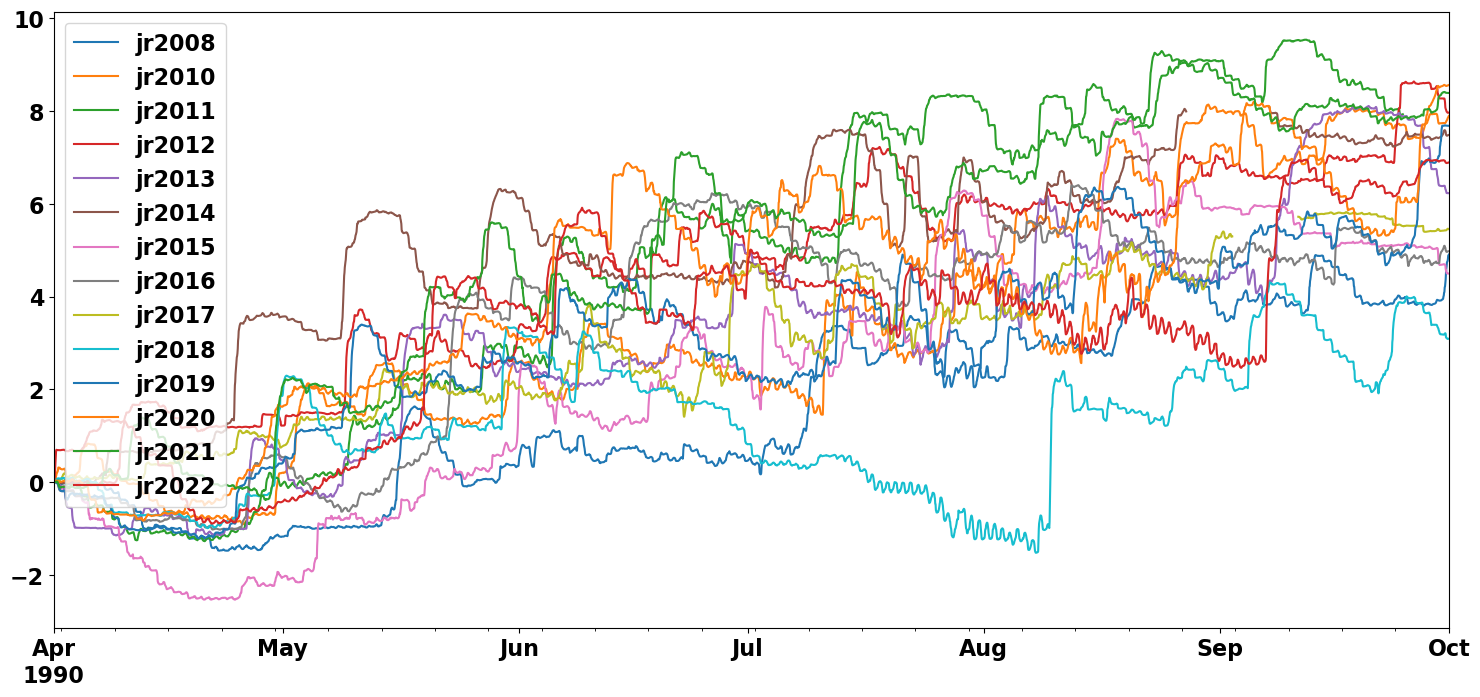

In [245]:
df_dendro_I5_fix.iloc[:,1:-1].plot()

<Axes: xlabel='datetime'>

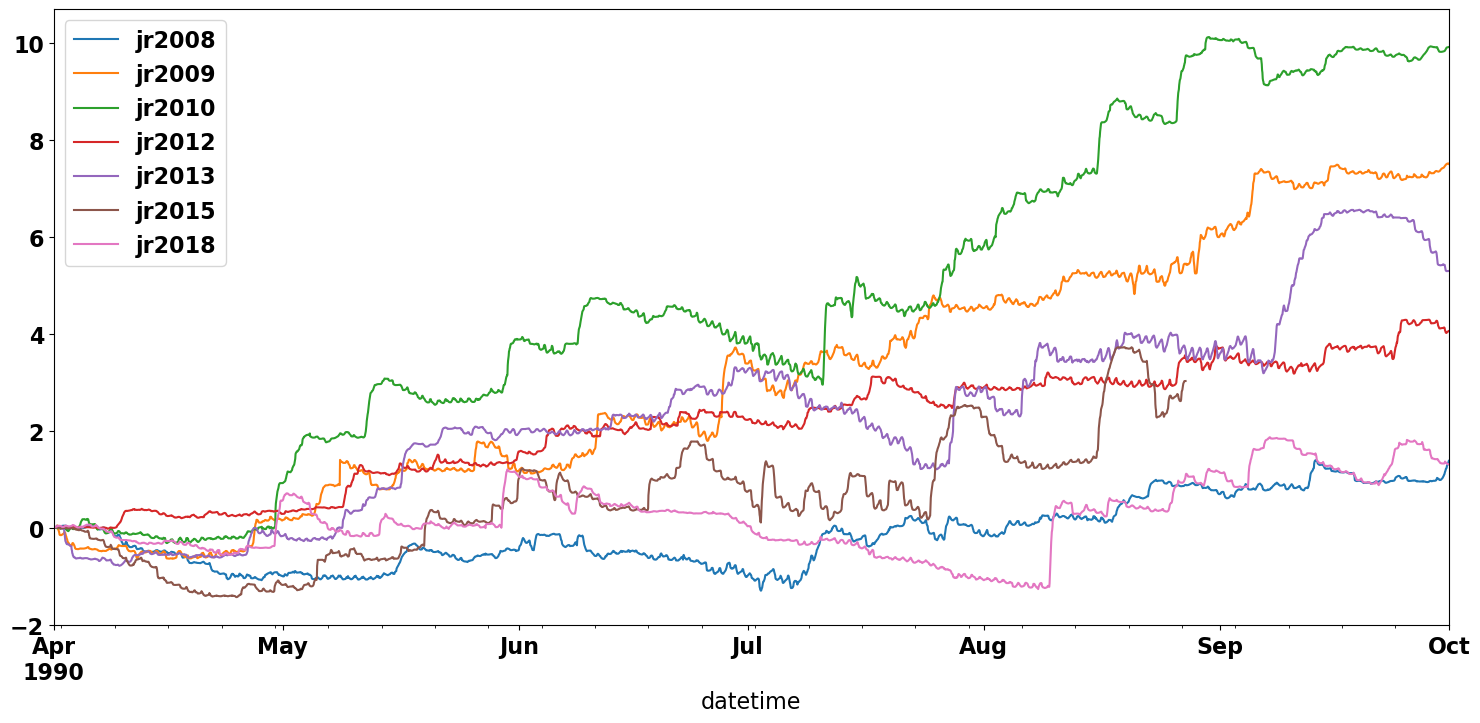

In [151]:
df_dendro_K7.iloc[:,1:-1].plot()

<Axes: xlabel='datetime'>

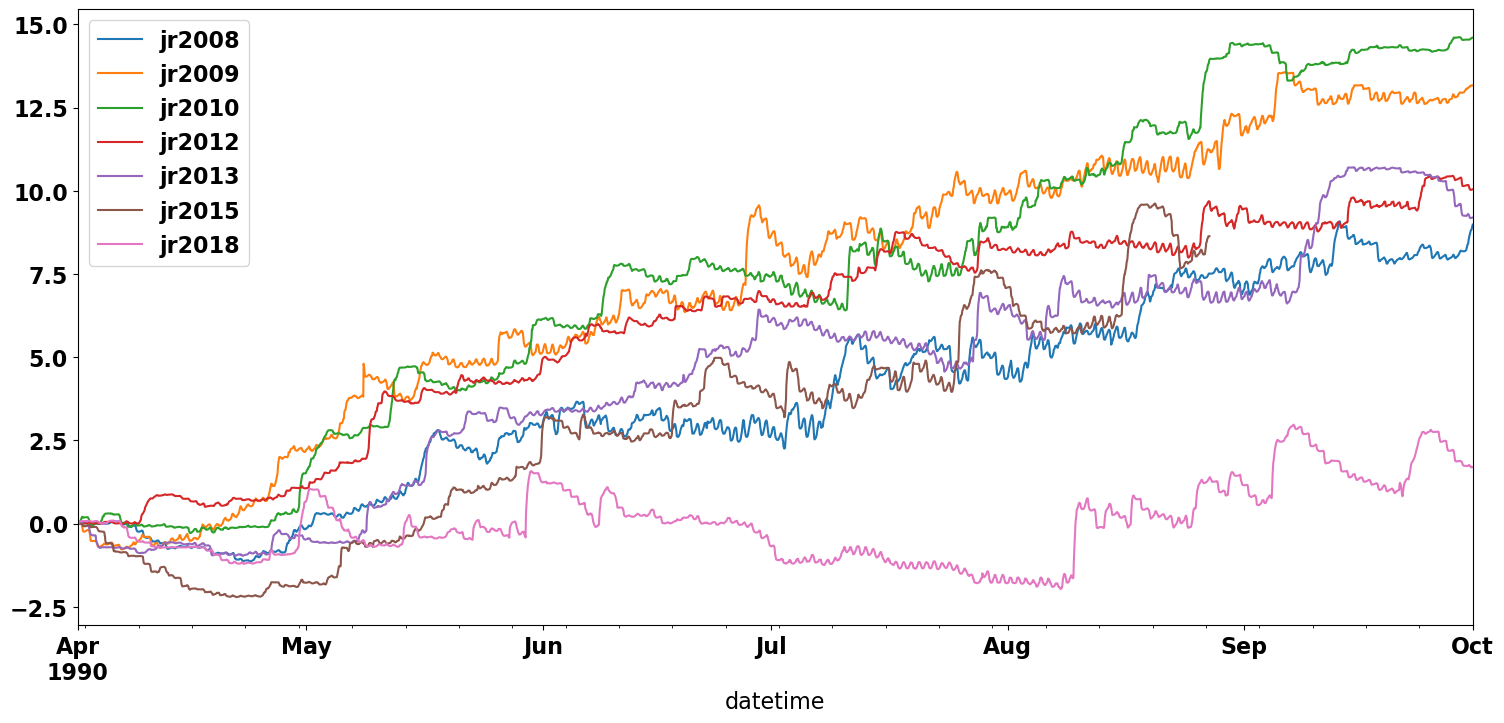

In [152]:
df_dendro_K8.iloc[:,1:-1].plot()

<Axes: xlabel='datetime'>

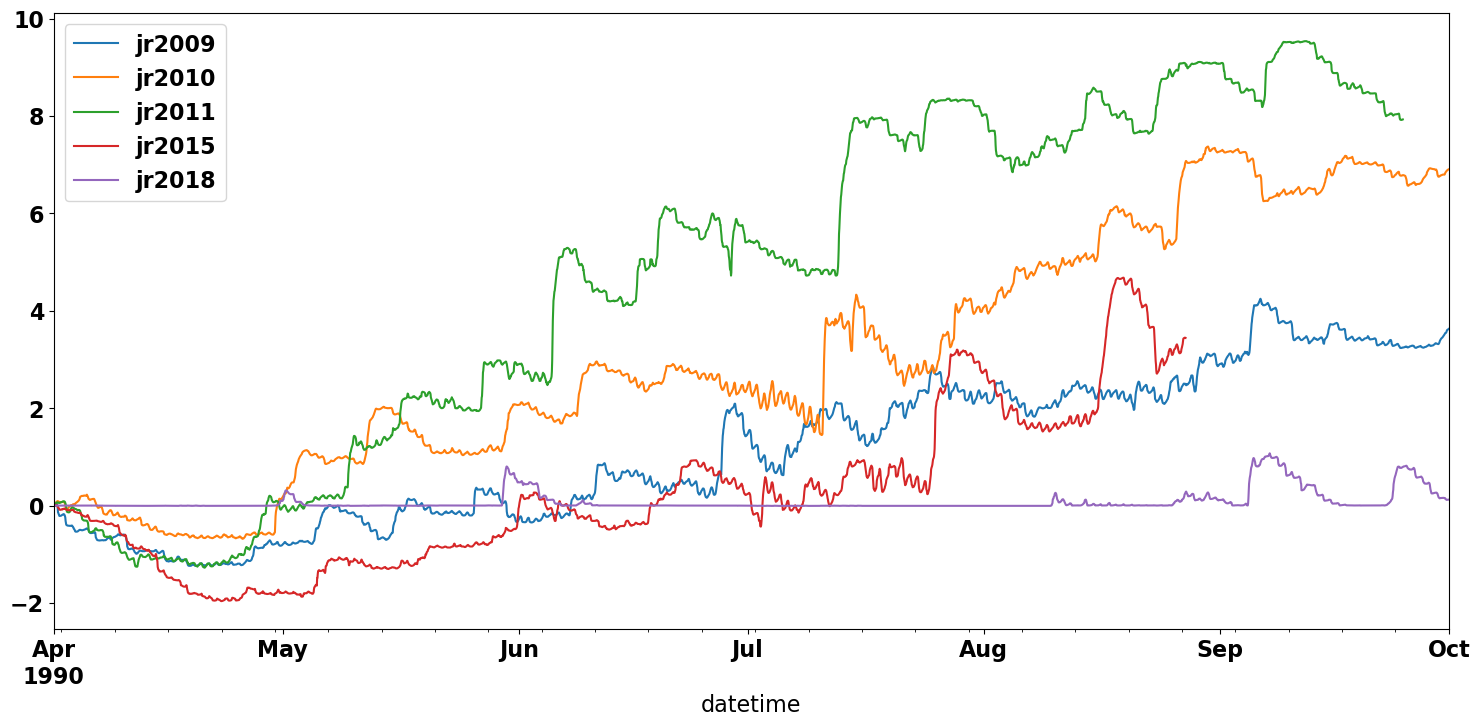

In [153]:
df_dendro_K9.iloc[:,1:-1].plot()

<Axes: >

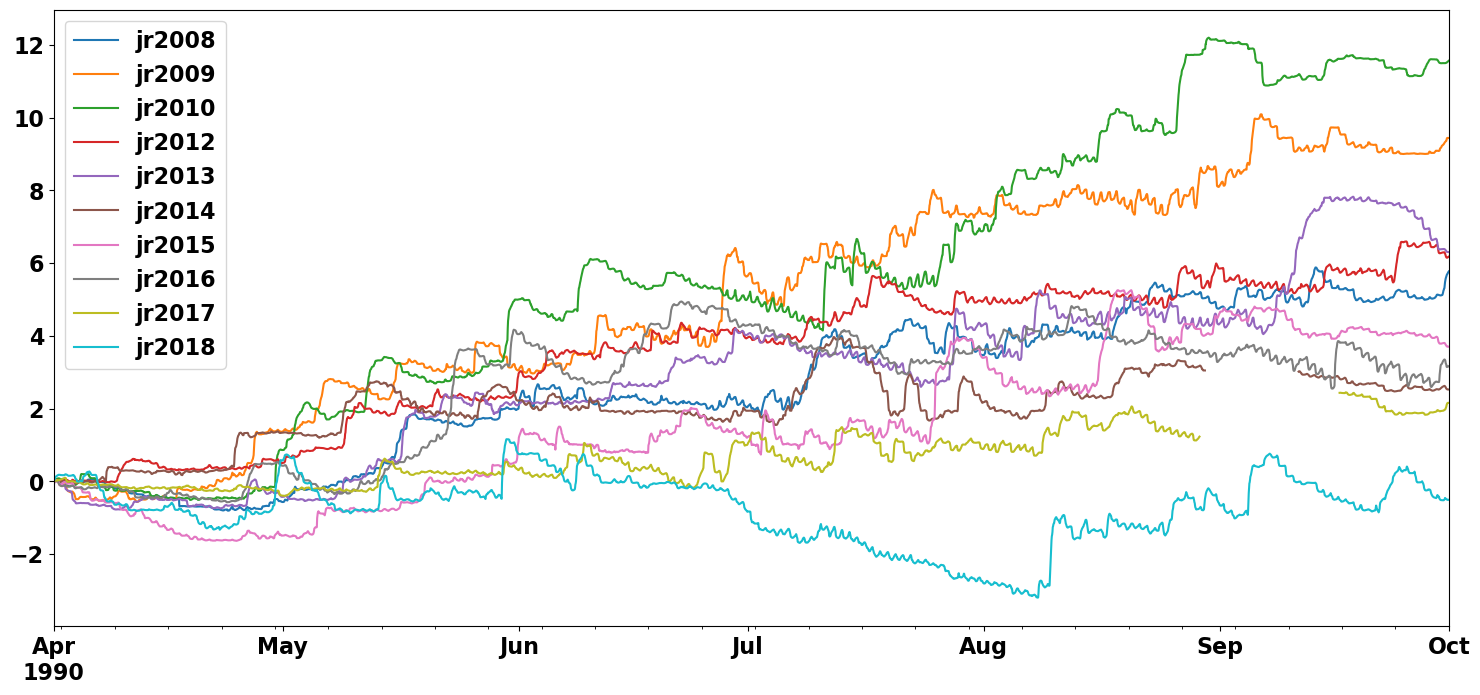

In [186]:
df_dendro_O3.iloc[:,1:-1].plot()

<Axes: xlabel='datetime'>

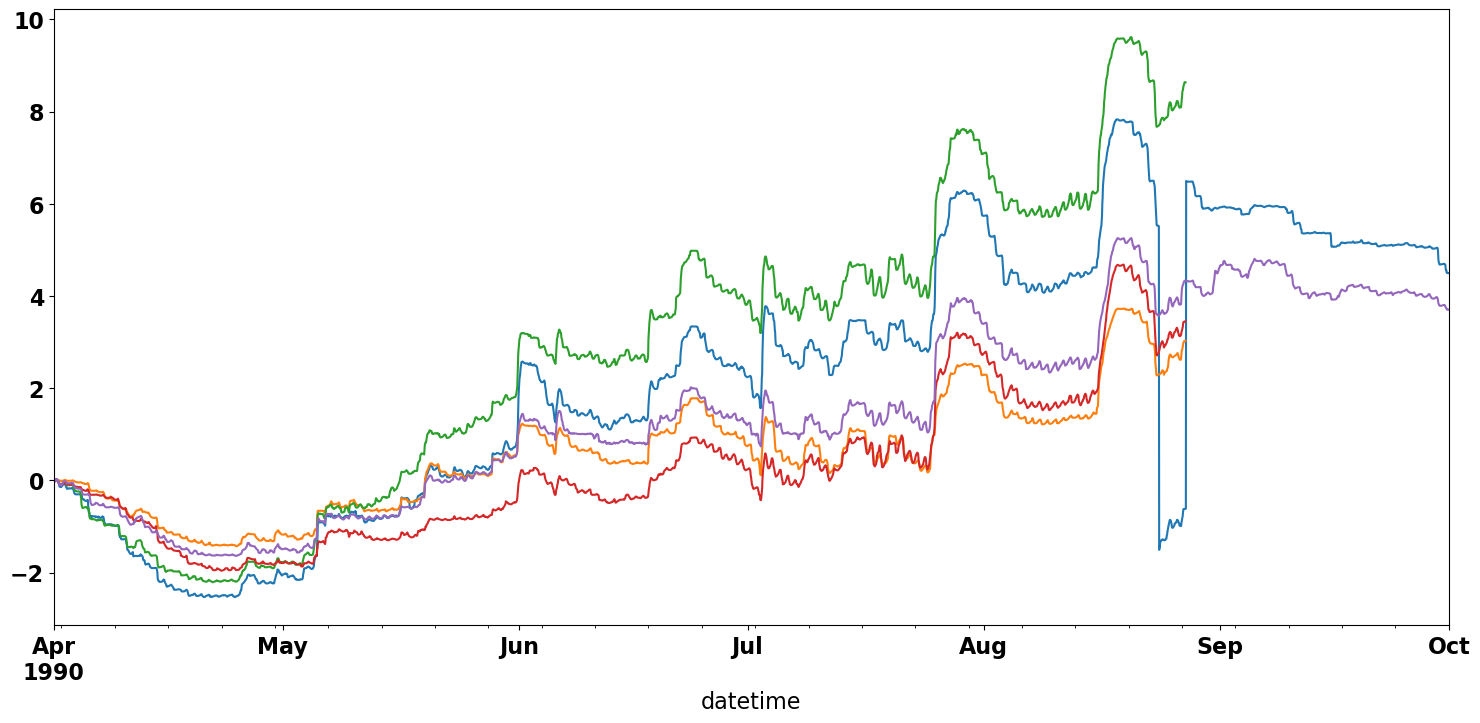

In [229]:
df_dendro_I5.loc[:,'jr2015'].plot(label='I5')
df_dendro_K7.loc[:,'jr2015'].plot(label='K7')
df_dendro_K8.loc[:,'jr2015'].plot(label='K8')
df_dendro_K9.loc[:,'jr2015'].plot(label='K9')
df_dendro_O3.loc[:,'jr2015'].plot(label='O3')

In [172]:
#with pd.option_context('display.max_rows', 70000 , 'display.max_columns', 2):
#	print(df_dendro_O3)


#### point dendro

In [147]:
df_dendro_I5r

groei
jr2022                    
2022-03-31 22:00:00      0
2022-03-31 22:15:00     -1
2022-03-31 22:30:00     -1
2022-03-31 22:45:00     -1
2022-03-31 23:00:00      0
...                    ...
2022-09-30 21:00:00    638
2022-09-30 21:15:00    638
2022-09-30 21:30:00    638
2022-09-30 21:45:00    638
2022-09-30 22:00:00    638

[17569 rows x 1 columns]

In [142]:
df_dendro_K7r

groei
jr2022                    
2022-03-31 22:00:00      0
2022-03-31 22:15:00      2
2022-03-31 22:30:00      2
2022-03-31 22:45:00      2
2022-03-31 23:00:00      2
...                    ...
2022-09-30 21:00:00   1041
2022-09-30 21:15:00   1041
2022-09-30 21:30:00   1041
2022-09-30 21:45:00   1041
2022-09-30 22:00:00   1041

[17569 rows x 1 columns]

In [143]:
df_dendro_K8r

groei
jr2022                    
2022-03-31 22:00:00      0
2022-03-31 22:15:00      0
2022-03-31 22:30:00      0
2022-03-31 22:45:00      0
2022-03-31 23:00:00      0
...                    ...
2022-09-30 21:00:00   1269
2022-09-30 21:15:00   1269
2022-09-30 21:30:00   1270
2022-09-30 21:45:00   1269
2022-09-30 22:00:00   1270

[17569 rows x 1 columns]

In [144]:
df_dendro_K9r

groei
jr2022                    
2022-03-31 22:00:00      0
2022-03-31 22:15:00      0
2022-03-31 22:30:00      1
2022-03-31 22:45:00      1
2022-03-31 23:00:00      1
...                    ...
2022-09-30 21:00:00    487
2022-09-30 21:15:00    488
2022-09-30 21:30:00    488
2022-09-30 21:45:00    487
2022-09-30 22:00:00    488

[17569 rows x 1 columns]

In [145]:
df_dendro_O3r

groei
jr2022                    
2022-03-31 22:00:00      0
2022-03-31 22:15:00      1
2022-03-31 22:30:00      1
2022-03-31 22:45:00      1
2022-03-31 23:00:00      1
...                    ...
2022-09-30 21:00:00   1789
2022-09-30 21:15:00   1789
2022-09-30 21:30:00   1789
2022-09-30 21:45:00   1789
2022-09-30 22:00:00   1789

[17569 rows x 1 columns]

#### point dendro graph

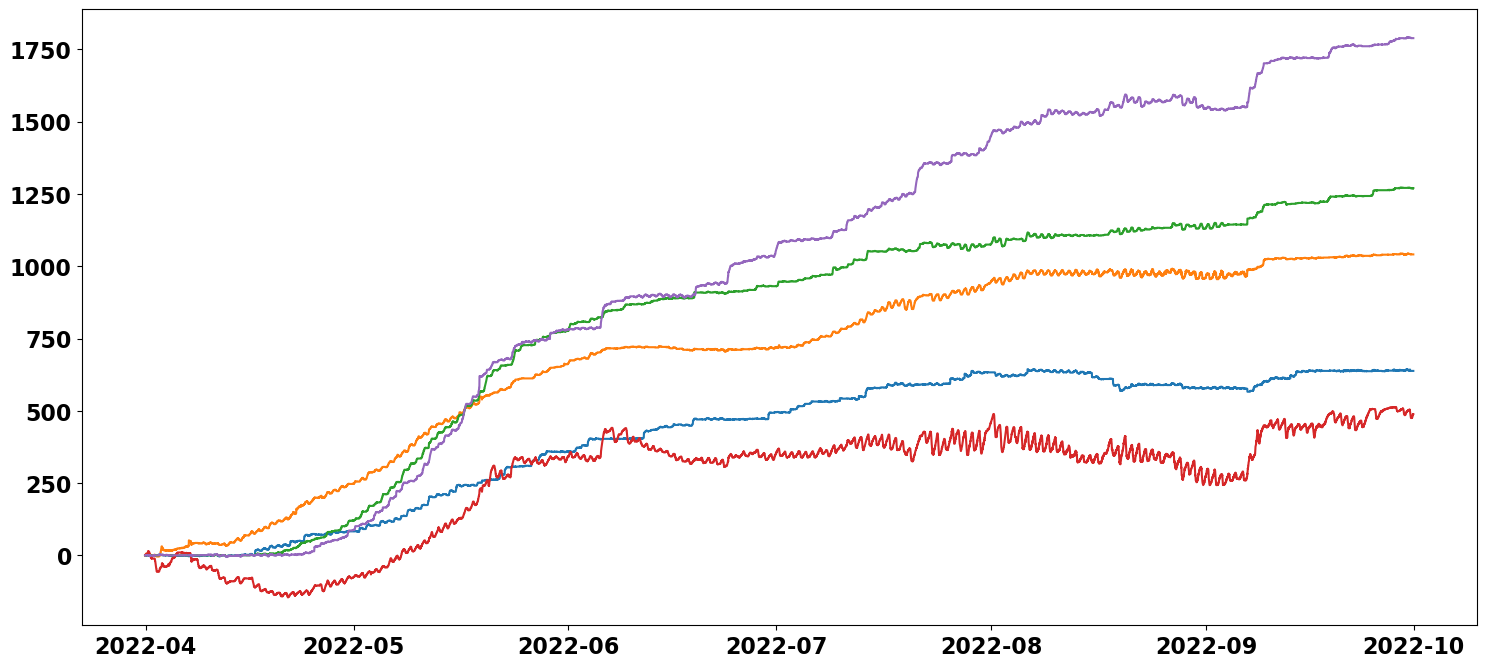

In [148]:
plt.plot(df_dendro_I5r)
plt.plot(df_dendro_K7r)
plt.plot(df_dendro_K8r)
plt.plot(df_dendro_K9r)
plt.plot(df_dendro_O3r)

## Plot multiple years of dendrometer growth

In [7]:
# quick resample
#df_dendro_I5=df_dendro_I5.resample('1D').mean()
#df_dendro_O3=df_dendro_O3.resample('1D').mean()

### 2008-2011

In [7]:
plt.rcParams["figure.figsize"] = (18,8)

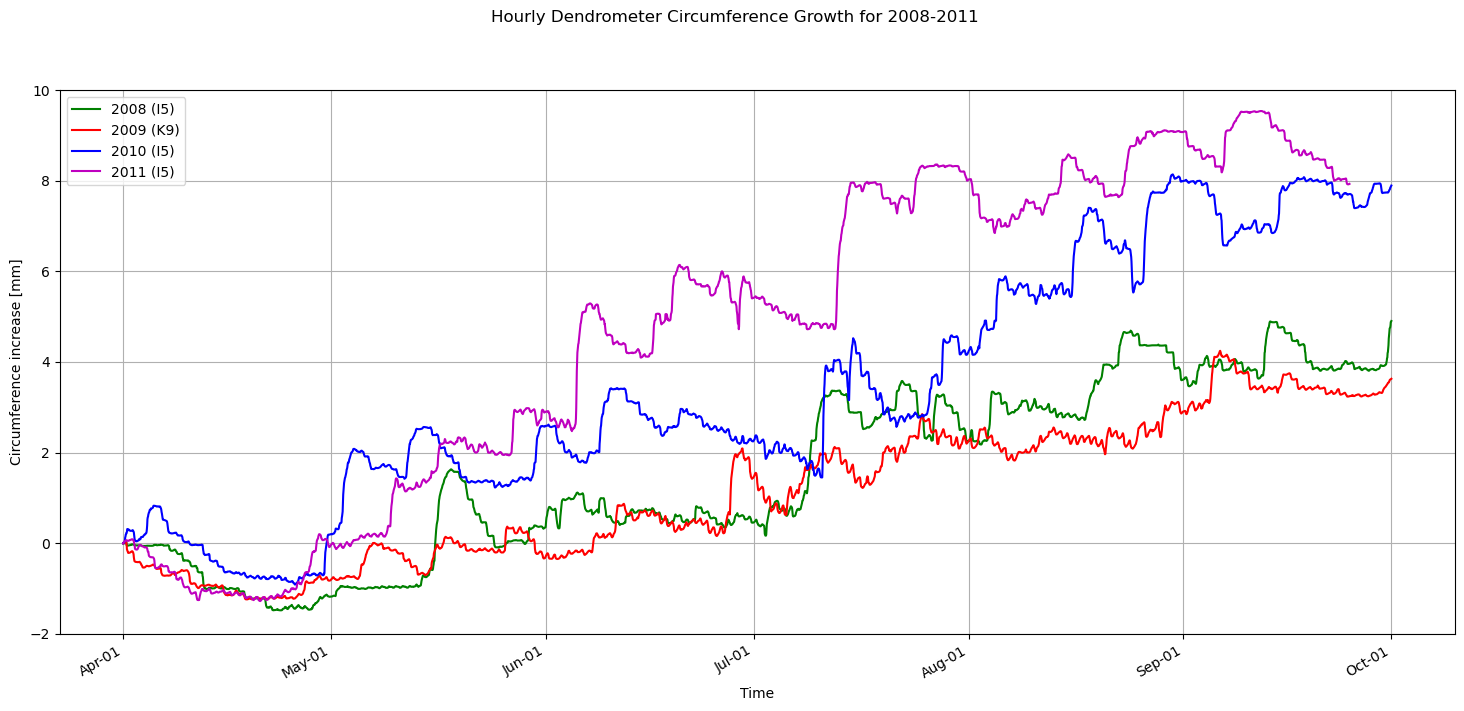

In [9]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "g-", label="2008")
p2, = ax.plot(df_dendro_K9['jr2009'], "r-", label="2009")
p3, = ax.plot(df_dendro_I5['jr2010'], "b-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
fig.suptitle('Hourly Dendrometer Circumference Growth for 2008-2011')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4],labels=['2008 (I5)','2009 (K9)','2010 (I5)','2011 (I5)'], loc='upper left')

plt.grid()
plt.show()

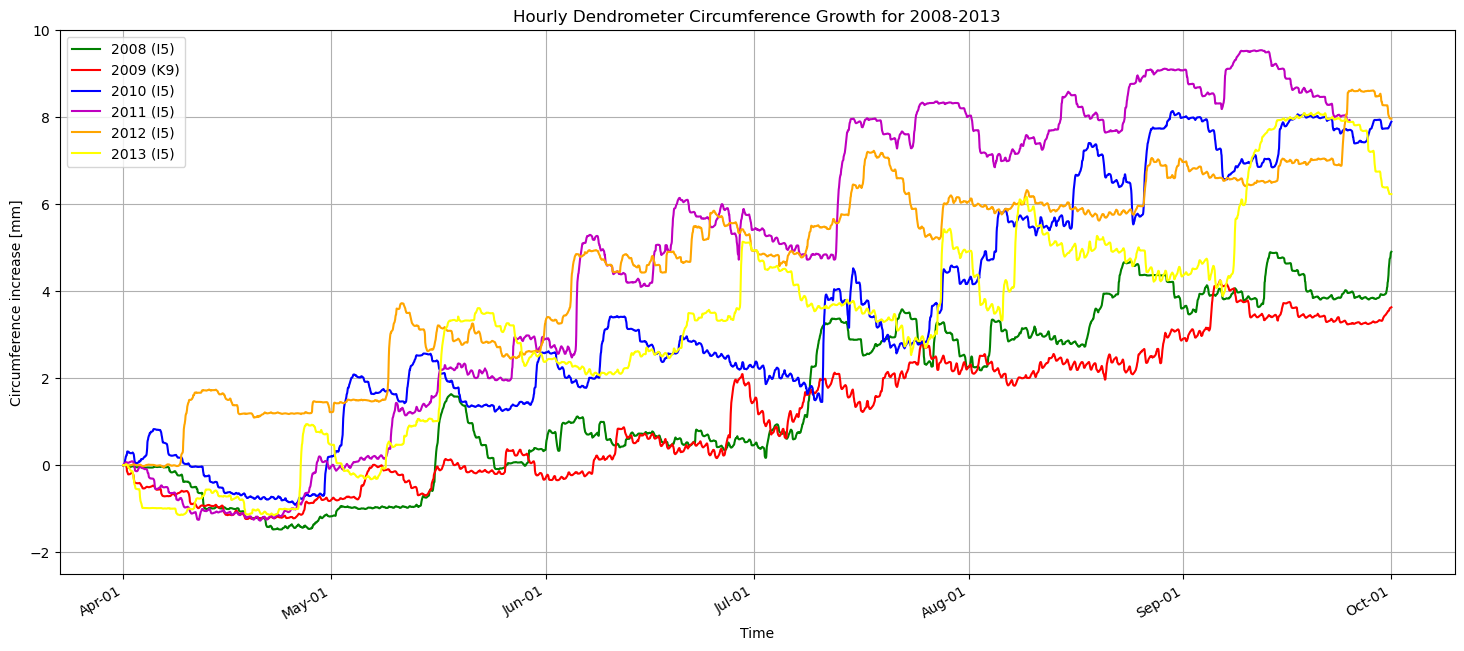

In [10]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "g-", label="2008")
p2, = ax.plot(df_dendro_K9['jr2009'], "r-", label="2009")
p3, = ax.plot(df_dendro_I5['jr2010'], "b-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")
p5, = ax.plot(df_dendro_I5['jr2012'], "orange", label="2012")
p6, = ax.plot(df_dendro_I5['jr2013'], "yellow", label="2013")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2.5,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2008-2013')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4,p5,p6],labels=['2008 (I5)','2009 (K9)','2010 (I5)','2011 (I5)','2012 (I5)','2013 (I5)'], loc='upper left')

plt.grid()
plt.show()

### 2012-2015

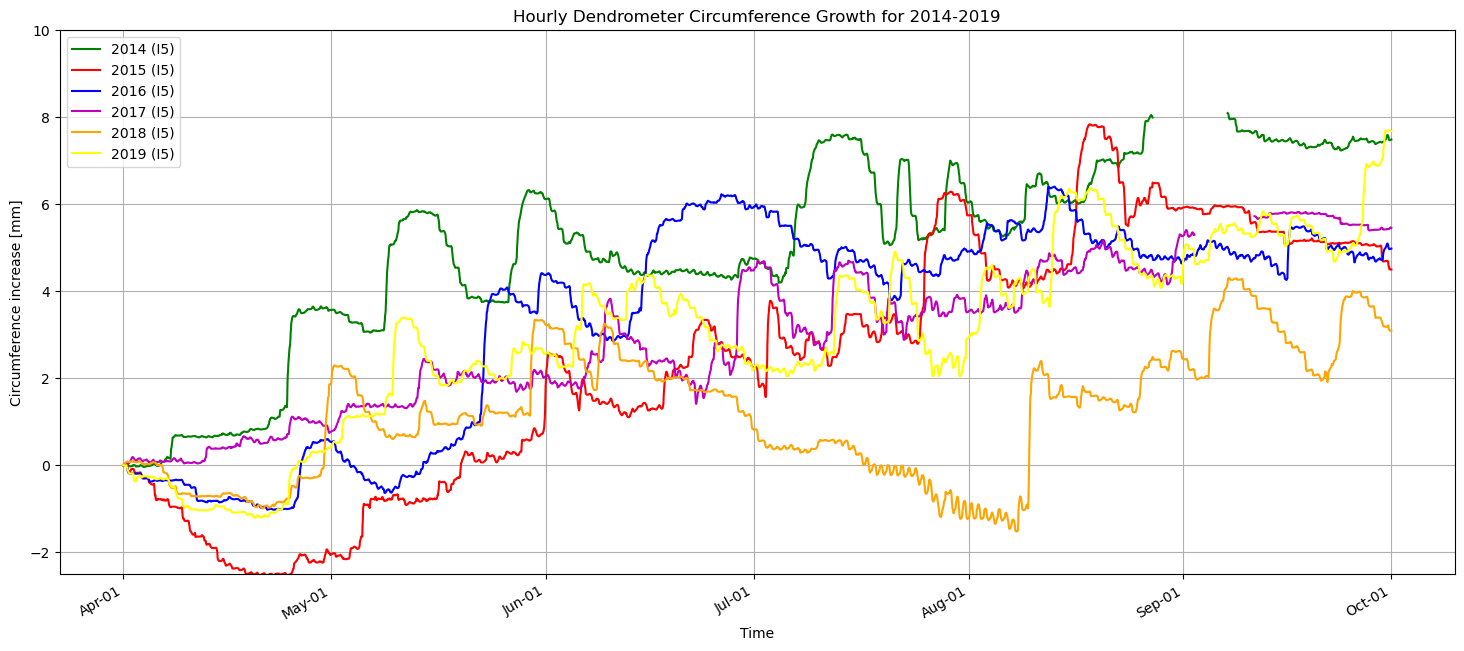

In [8]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values

p1, = ax.plot(df_dendro_I5['jr2014'], "g-", label="2014")
p2, = ax.plot(df_dendro_I5['jr2015'], "r-", label="2015")
p3, = ax.plot(df_dendro_I5['jr2016'], "b-", label="2016")
p4, = ax.plot(df_dendro_I5['jr2017'], "m-", label="2017")
p5, = ax.plot(df_dendro_I5['jr2018'], "orange", label="2018")
p6, = ax.plot(df_dendro_I5['jr2019'], "yellow", label="2019")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2.5,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2014-2019')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4,p5,p6],labels=['2014 (I5)','2015 (I5)','2016 (I5)','2017 (I5)','2018 (I5)','2019 (I5)'],loc='upper left')

plt.grid()
plt.show()

## All years

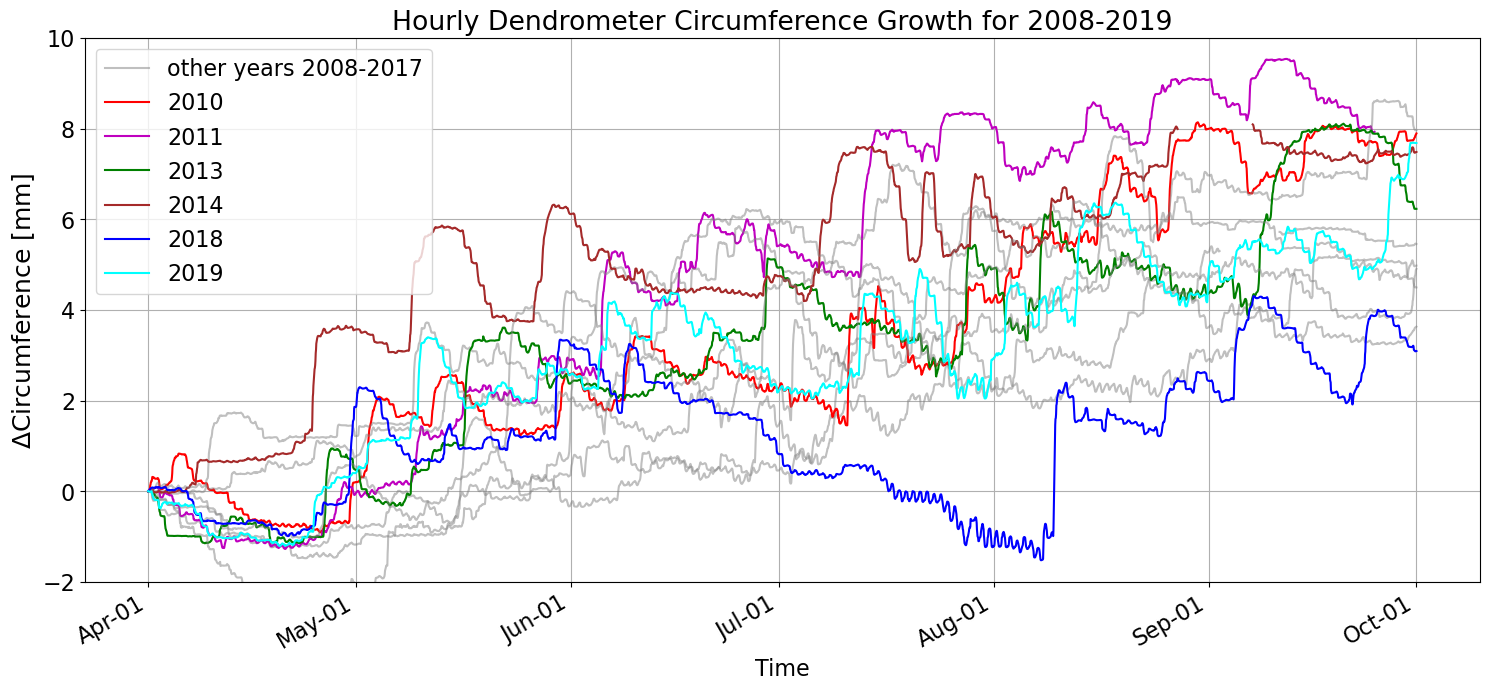

In [12]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)
#plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 16})
#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "grey",alpha = 0.5, label="other years 2008-2017")
p2, = ax.plot(df_dendro_K9['jr2009'], "grey",alpha = 0.5, label='_nolegend_')
p3, = ax.plot(df_dendro_I5['jr2010'], "r-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")
p5, = ax.plot(df_dendro_I5['jr2012'], "grey",alpha = 0.5, label='_nolegend_')
p6, = ax.plot(df_dendro_I5['jr2013'], "g-", label="2013")
p7, = ax.plot(df_dendro_I5['jr2014'], "brown", label="2014")
p8, = ax.plot(df_dendro_I5['jr2015'], "grey",alpha = 0.5, label='_nolegend_')
p9, = ax.plot(df_dendro_I5['jr2016'], "grey",alpha = 0.5, label='_nolegend_')
p10, = ax.plot(df_dendro_I5['jr2017'], "grey",alpha = 0.5, label='_nolegend_')
p11, = ax.plot(df_dendro_I5['jr2018'], "b-", label="2018")
p12, = ax.plot(df_dendro_I5['jr2019'], "cyan", label="2019")


#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2,10)
        
#set axis labels
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel(r"$\Delta$Circumference [mm]",fontsize=18)
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2008-2019')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(loc='upper left') 
plt.grid()
plt.show()

# Detrend dendrometers

In [13]:
import numpy as np
import scipy as sp
from scipy.fft import fftfreq
from scipy.fft import fft,ifft,fft2,ifft2

In [16]:
df_I5=df_dendro_I5.loc[:,['jr2018','jr2019']].copy()
df_I5=df_I5.reset_index()
df_I5

datetime   jr2018   jr2019
0    1900-04-01 00:00:00  0.00000  0.00000
1    1900-04-01 01:00:00  0.00290 -0.00097
2    1900-04-01 02:00:00  0.00871 -0.00387
3    1900-04-01 03:00:00  0.01451 -0.00774
4    1900-04-01 04:00:00  0.02614 -0.00968
...                  ...      ...      ...
4388 1900-09-30 20:00:00  3.08705  7.68086
4389 1900-09-30 21:00:00  3.08609  7.68086
4390 1900-09-30 22:00:00  3.08899  7.68183
4391 1900-09-30 23:00:00  3.08899  7.68086
4392 1900-10-01 00:00:00  3.09093  7.68086

[4393 rows x 3 columns]

In [17]:
N = 4393 #(measurements)
T = 1 #(hour)

In [18]:
t = df_I5.index
np.diff(t)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
f = fftfreq(len(t)-1, np.diff(t))
f

array([ 0.        ,  0.00022769,  0.00045537, ..., -0.00068306,
       -0.00045537, -0.00022769])

In [20]:
x1_FFT=fft(df_I5.loc[:,'jr2019'].values)

In [21]:
df_I5.loc[:,'jr2019'].values

array([ 0.00000e+00, -9.70000e-04, -3.87000e-03, ...,  7.68183e+00,
        7.68086e+00,  7.68086e+00])

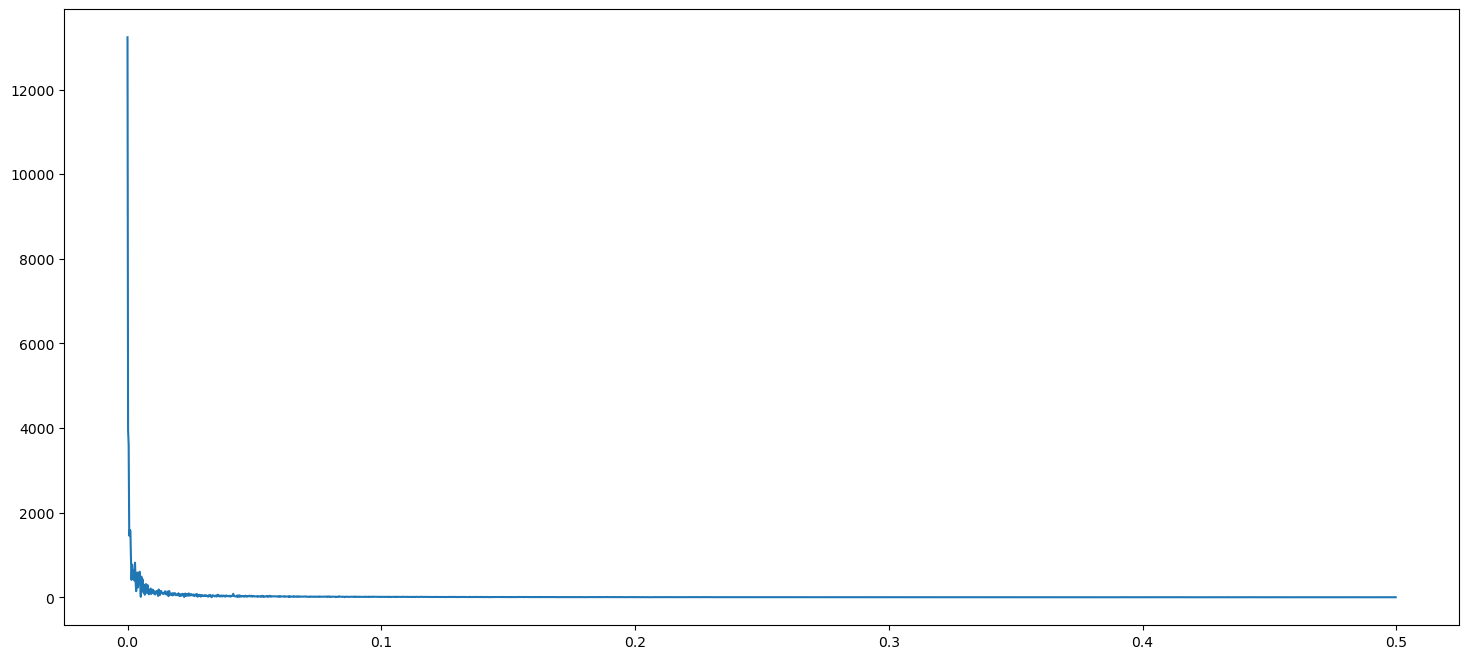

In [22]:
plt.plot(f[:N//2],np.abs(x1_FFT[:-1][:N//2]))

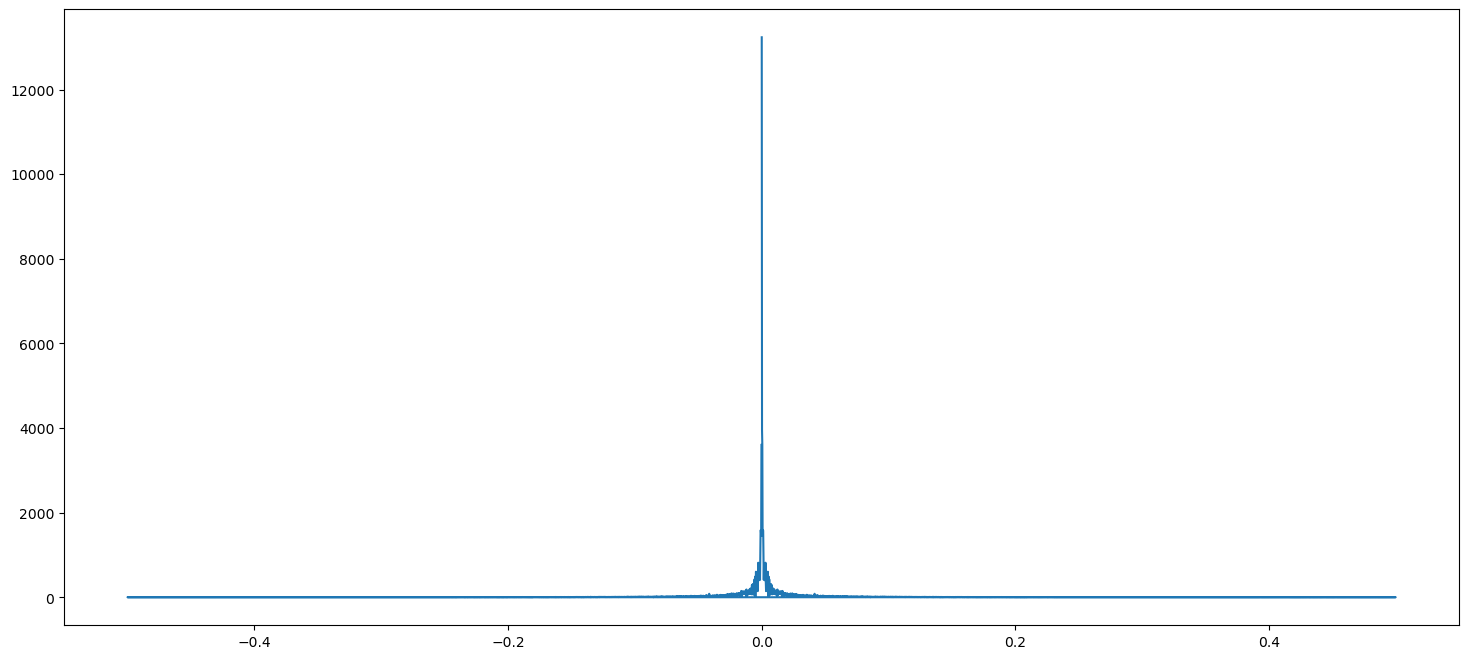

In [23]:
plt.plot(f,np.abs(x1_FFT[:-1]))

In [24]:
    df_I5.loc[:,'jr2019'].reset_index().index[-1]

4392

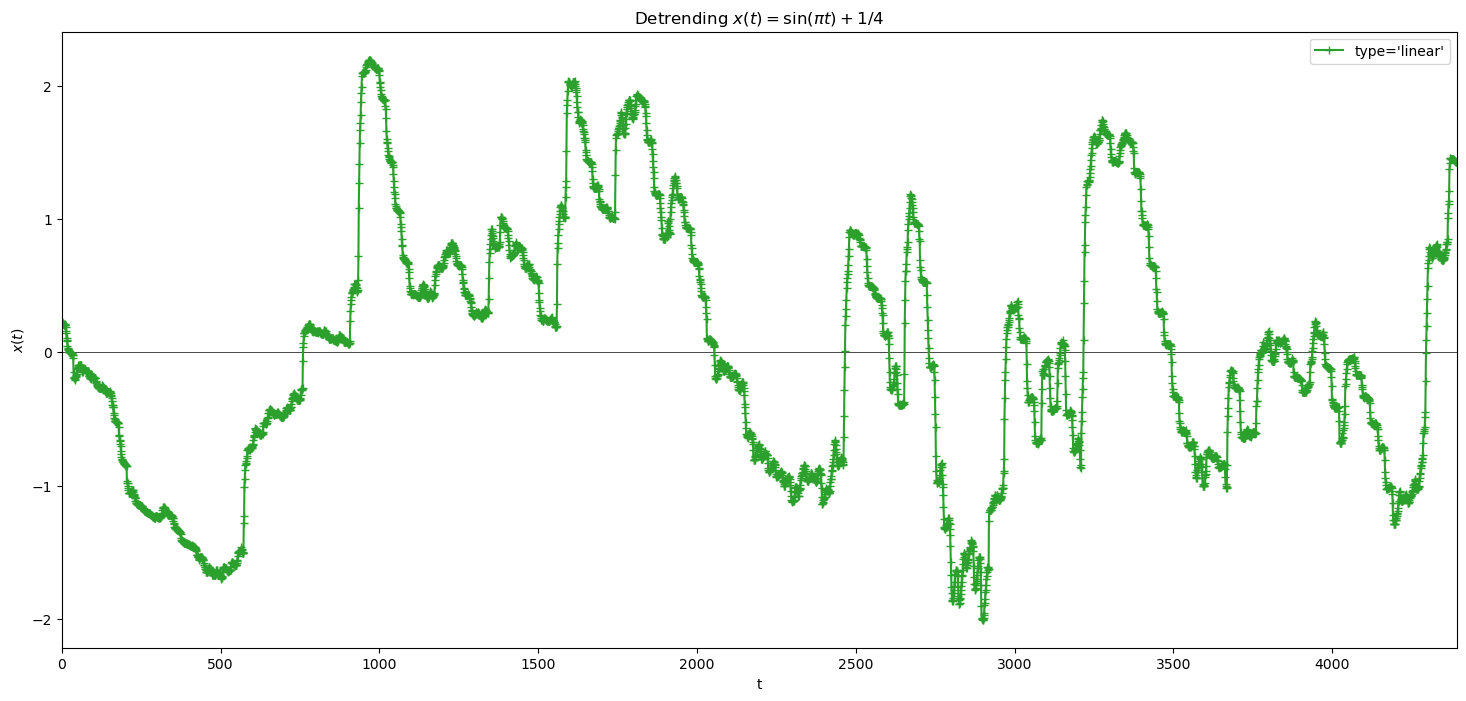

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend

#t = np.linspace(-0.5, 0.5, 21)

t = df_I5.loc[:,'jr2019'].reset_index().index
x = df_I5.loc[:,'jr2019'].values

#x_d_const = detrend(x, type='constant')
#x_d_linear = detrend(x, type='linear')

x_d_linear = detrend(x, type='linear')

fig1, ax1 = plt.subplots()
ax1.set_title(r"Detrending $x(t)=\sin(\pi t) + 1/4$")
ax1.set(xlabel="t", ylabel="$x(t)$", xlim=(t[0], t[-1]))
ax1.axhline(y=0, color='black', linewidth=.5)
ax1.axvline(x=0, color='black', linewidth=.5)
#ax1.plot(t, x, 'C0.-',  label="No detrending")
#ax1.plot(t, x_d_const, 'C1x-', label="type='constant'")
ax1.plot(t, x_d_linear, 'C2+-', label="type='linear'")

ax1.legend()
plt.show()

In [26]:
df_I5

datetime   jr2018   jr2019
0    1900-04-01 00:00:00  0.00000  0.00000
1    1900-04-01 01:00:00  0.00290 -0.00097
2    1900-04-01 02:00:00  0.00871 -0.00387
3    1900-04-01 03:00:00  0.01451 -0.00774
4    1900-04-01 04:00:00  0.02614 -0.00968
...                  ...      ...      ...
4388 1900-09-30 20:00:00  3.08705  7.68086
4389 1900-09-30 21:00:00  3.08609  7.68086
4390 1900-09-30 22:00:00  3.08899  7.68183
4391 1900-09-30 23:00:00  3.08899  7.68086
4392 1900-10-01 00:00:00  3.09093  7.68086

[4393 rows x 3 columns]

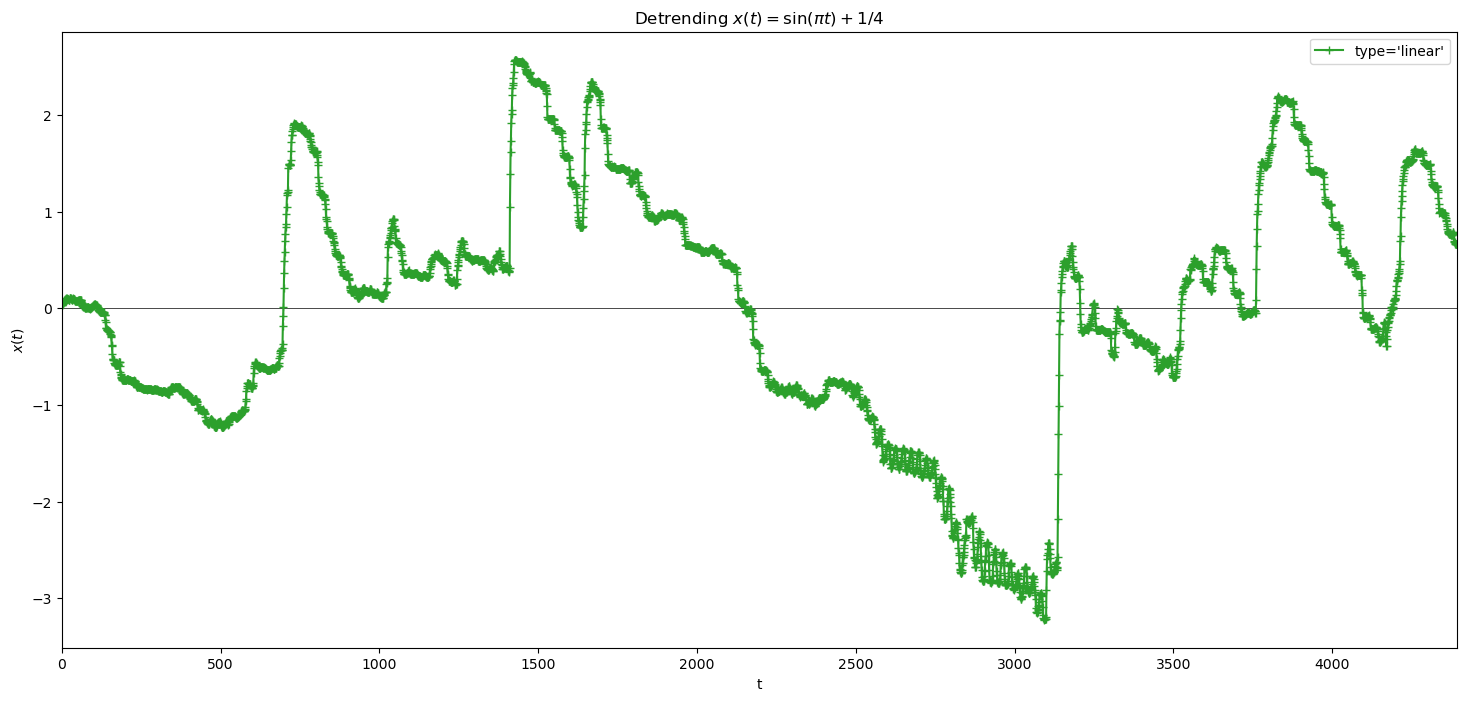

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend

#t = np.linspace(-0.5, 0.5, 21)

t = df_I5.loc[:,'jr2018'].reset_index().index
x = df_I5.loc[:,'jr2018'].values

#x_d_const = detrend(x, type='constant')
#x_d_linear = detrend(x, type='linear')

x_d_linear = detrend(x, type='linear')

fig1, ax1 = plt.subplots()
ax1.set_title(r"Detrending $x(t)=\sin(\pi t) + 1/4$")
ax1.set(xlabel="t", ylabel="$x(t)$", xlim=(t[0], t[-1]))
ax1.axhline(y=0, color='black', linewidth=.5)
ax1.axvline(x=0, color='black', linewidth=.5)
#ax1.plot(t, x, 'C0.-',  label="No detrending")
#ax1.plot(t, x_d_const, 'C1x-', label="type='constant'")
ax1.plot(t, x_d_linear, 'C2+-', label="type='linear'")

ax1.legend()
plt.show()

## new detrend (2015 only)

In [250]:
from scipy.signal import detrend

def detrend_dendro(s):
    s.dropna(inplace=True)
    vals=detrend(s, type='linear')
    return pd.Series(data = vals, index=s.index) 

In [253]:
#df_dendro_K9.loc[:,'jr2015'].plot()

In [269]:
#dendro_b_2015.dropna(how='any')
# K7 through 9 end at 08-25 11:00 (aug 25th) whereas I5 and O3 end at 1 october 

<Axes: >

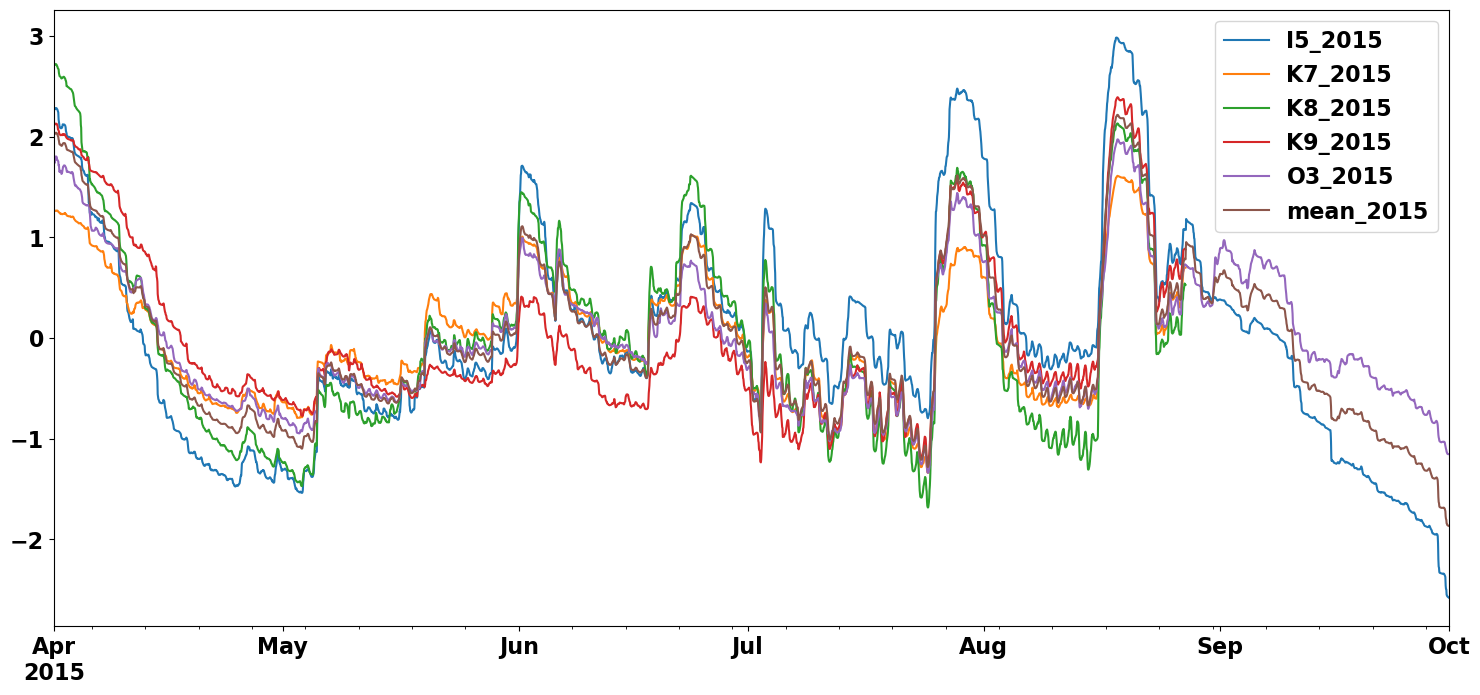

In [274]:
dendro_b_2015 = pd.DataFrame()
dendro_b_2015['I5_2015'] = detrend_dendro(df_dendro_I5.loc[:,'jr2015'])
dendro_b_2015['K7_2015'] = detrend_dendro(df_dendro_K7.loc[:,'jr2015']) #this year has missing data in it, omit (linear detrend over same time period not possible
dendro_b_2015['K8_2015'] = detrend_dendro(df_dendro_K8.loc[:,'jr2015'])
dendro_b_2015['K9_2015'] = detrend_dendro(df_dendro_K9.loc[:,'jr2015'])
dendro_b_2015['O3_2015'] = detrend_dendro(df_dendro_O3.loc[:,'jr2015'])
dendro_b_2015['mean_2015'] = dendro_b_2015.loc[:,['I5_2015','K7_2015','K8_2015','K9_2015','O3_2015']].mean(axis=1)
new_index=pd.to_datetime(dendro_b_2015.index.strftime(date_format='2015-%m-%d %H:%M')) #correct the year
dendro_b_2015.set_index(new_index,inplace=True)
dendro_b_2015.plot() # n = 5 up until 27th aug 11:00, after which n=2

## new detrend (2018 only)

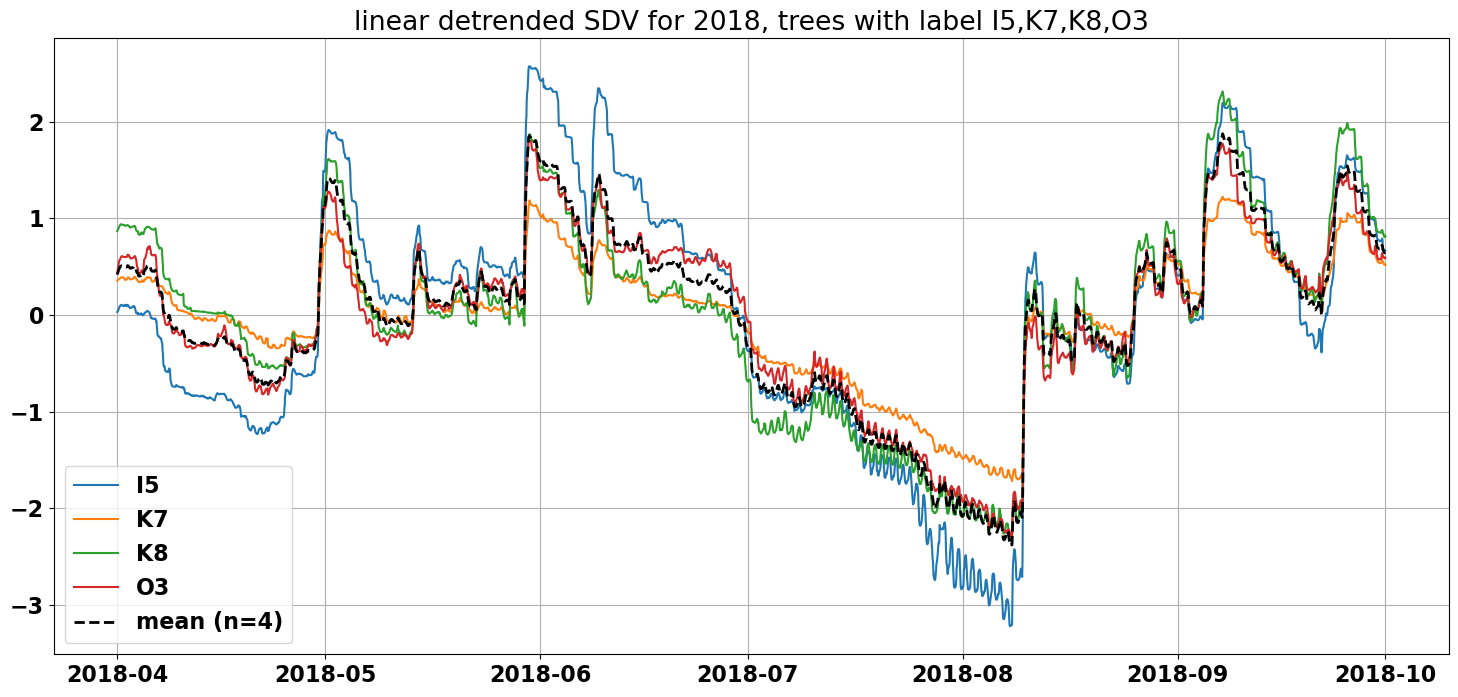

In [491]:
dendro_b_2018 = pd.DataFrame()
dendro_b_2018['I5_2018'] = detrend_dendro(df_dendro_I5.loc[:,'jr2018'])
dendro_b_2018['K7_2018'] = detrend_dendro(df_dendro_K7.loc[:,'jr2018'])
dendro_b_2018['K8_2018'] = detrend_dendro(df_dendro_K8.loc[:,'jr2018'])
#dendro_b_2018['K9_2018'] = detrend_dendro(df_dendro_K9.loc[:,'jr2018']) #this year has errors/missing data in it, omit
dendro_b_2018['O3_2018'] = detrend_dendro(df_dendro_O3.loc[:,'jr2018'])
dendro_b_2018['mean_2018'] = dendro_b_2018.loc[:,['I5_2018','K7_2018','K8_2018','O3_2018']].mean(axis=1)
new_index=pd.to_datetime(dendro_b_2015.index.strftime(date_format='2018-%m-%d %H:%M')) #correct the year
dendro_b_2018.set_index(new_index,inplace=True)

fig,ax = plt.subplots()

ax.plot(dendro_b_2018.loc[:,'I5_2018'],label = 'I5')
ax.plot(dendro_b_2018.loc[:,'K7_2018'],label = 'K7')
ax.plot(dendro_b_2018.loc[:,'K8_2018'],label = 'K8')
#ax.plot(dendro_b_2018.loc[:,'K9_2018'])
ax.plot(dendro_b_2018.loc[:,'O3_2018'],label = 'O3')
ax.plot(dendro_b_2018.loc[:,'mean_2018'],'k--',linewidth=2.0,label = 'mean (n=4)')
ax.legend()
ax.set_title('linear detrended SDV for 2018, trees with label I5,K7,K8,O3')
ax.grid()

<Axes: >

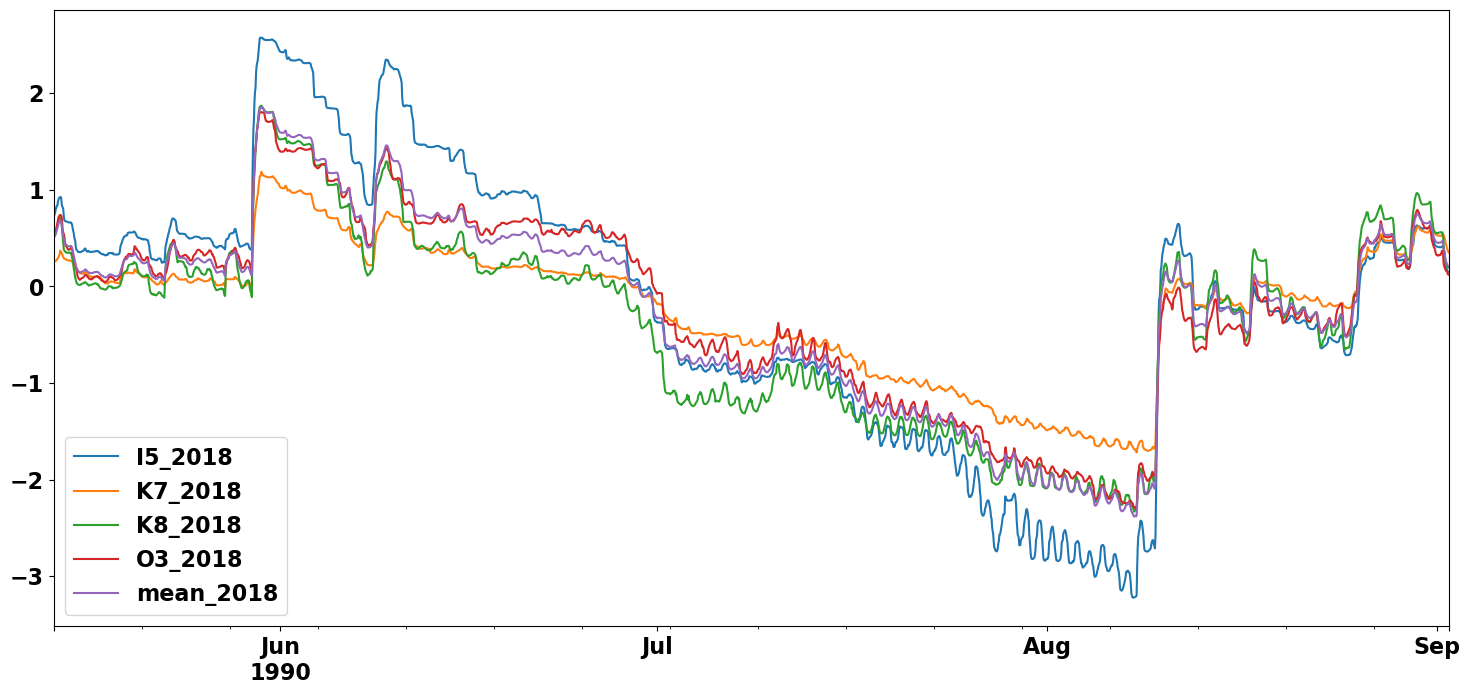

In [277]:
# zoom in on the drought of 2018
dendro_b_2018.loc['1990-05-14':'1990-09-01'].plot()

## new detrend (I5 only)

In [369]:
key='2008'
vals = dendro_b_I5.loc[:,key]
vals
#vals.reindex(vals.index.dt.replace(year=key))
#vals2=detrend_dendro(dendro_b_I5.loc[:,key])
#s=pd.Series(data = vals2)

KeyError: '2008'

In [344]:
dendro_I5_seq = pd.DataFrame()

for key in ['2008','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']:
    vals = dendro_b_I5.loc[:,key]
    vals.reindex(vals.index.dt.replace(year=key))
    vals2=detrend_dendro(dendro_b_I5.loc[:,key])
    s=pd.Series(data = vals2)

#    df=pd.DataFrame(data = {key:vals}, index=df_dendro_I5.loc[:,key].index, columns=key)
    print(s)
    #df=pd.DataFrame(s)
#    new_index=df.index.strftime(date_format=key[2:]+'-%m-%d %H:%M') #correct the year
#    print(new_index)
    #df=s.set_index(new_index)
    
    #pd.Series(data = vals, index=new_index).plot()

#dendro_b_I5['jr2008']=detrend_dendro(df_dendro_I5.loc[:,'jr2008'])
#dendro_b_I5['jr2010']=detrend_dendro(df_dendro_I5.loc[:,'jr2010'])
#dendro_b_I5['jr2011']=detrend_dendro(df_dendro_I5.loc[:,'jr2011'])
#dendro_b_I5['jr2012']=detrend_dendro(df_dendro_I5.loc[:,'jr2012'])
#dendro_b_I5['jr2013']=detrend_dendro(df_dendro_I5.loc[:,'jr2013'])
#dendro_b_I5['jr2014']=detrend_dendro(df_dendro_I5.loc[:,'jr2014'])
#dendro_b_I5['jr2015']=detrend_dendro(df_dendro_I5.loc[:,'jr2015'])
#dendro_b_I5['jr2016']=detrend_dendro(df_dendro_I5.loc[:,'jr2016'])
#dendro_b_I5['jr2017']=detrend_dendro(df_dendro_I5.loc[:,'jr2017'])
#dendro_b_I5['jr2018']=detrend_dendro(df_dendro_I5.loc[:,'jr2018'])
#dendro_b_I5['jr2019']=detrend_dendro(df_dendro_I5.loc[:,'jr2019'])
#dendro_b_I5['jr2020']=detrend_dendro(df_dendro_I5.loc[:,'jr2020'])
#dendro_b_I5['jr2021']=detrend_dendro(df_dendro_I5.loc[:,'jr2021'])
#dendro_b_I5['jr2022']=detrend_dendro(df_dendro_I5.loc[:,'jr2022'])

#dendro_b_I5



AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [371]:
dendro_b_I5 = df_dendro_I5.copy()

new_labels={'jr2008':'2008',
            'jr2010':'2010',
            'jr2011':'2011',
            'jr2012':'2012',
            'jr2013':'2013',
            'jr2014':'2014',
            'jr2015':'2015',
            'jr2016':'2016',
            'jr2017':'2017',
            'jr2018':'2018',
            'jr2019':'2019',
            'jr2020':'2020',
            'jr2021':'2021',
            'jr2022':'2022'}

dendro_b_I5.rename(columns=new_labels,inplace=True)
dendro_b_I5

groeiseizoen      2008     2010     2011     2012  \
1990-04-01 00:00:00    4/1/2024 0:00  0.000000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00    4/1/2024 1:00 -0.000969  0.00097  0.00581  0.00097   
1990-04-01 02:00:00    4/1/2024 2:00 -0.000969  0.01937  0.02034  0.00387   
1990-04-01 03:00:00    4/1/2024 3:00 -0.000969  0.02131  0.03002  0.00484   
1990-04-01 04:00:00    4/1/2024 4:00  0.000968  0.02034  0.03583  0.00581   
...                              ...       ...      ...      ...      ...   
1990-09-30 20:00:00  9/30/2024 20:00  4.765185  7.83966      NaN  7.96167   
1990-09-30 21:00:00  9/30/2024 21:00  4.804895  7.85225      NaN  7.96070   
1990-09-30 22:00:00  9/30/2024 22:00  4.884295  7.86000      NaN  7.96264   
1990-09-30 23:00:00  9/30/2024 23:00  4.889135  7.87646      NaN  7.96361   
1990-10-01 00:00:00   10/1/2024 0:00  4.903665  7.89195      NaN  7.96457   

                        2013     2014     2015     2016     2017     2018  \
1990-04-01 00:00:00  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
1990-04-01 01:00:00  0.00193  0.00194  0.00872 -0.00484  0.00290  0.00290   
1990-04-01 02:00:00  0.00290  0.00291  0.00388 -0.00291  0.00581  0.00871   
1990-04-01 03:00:00  0.00290  0.00291  0.00291 -0.00291  0.00290  0.01451   
1990-04-01 04:00:00  0.00193  0.00388  0.01646 -0.00291 -0.00097  0.02614   
...                      ...      ...      ...      ...      ...      ...   
1990-09-30 20:00:00  6.22931  7.47055  4.49737  4.97047  5.45640  3.08705   
1990-09-30 21:00:00  6.22738  7.47442  4.49544  4.97338  5.46221  3.08609   
1990-09-30 22:00:00  6.22834  7.48023  4.49544  4.97435  5.45931  3.08899   
1990-09-30 23:00:00  6.22834  7.48314  4.49641  4.97629  5.45446  3.08899   
1990-10-01 00:00:00  6.22834  7.48314  4.49447  4.97725  5.45156  3.09093   

                        2019     2020     2021     2022            datetime  
1990-04-01 00:00:00  0.00000  0.00000  0.00000  0.00000 2024-04-01 00:00:00  
1990-04-01 01:00:00 -0.00097 -0.00097  0.00000  0.05809 2024-04-01 01:00:00  
1990-04-01 02:00:00 -0.00387 -0.00484  0.00194  0.08715 2024-04-01 02:00:00  
1990-04-01 03:00:00 -0.00774 -0.00194  0.00290  0.11523 2024-04-01 03:00:00  
1990-04-01 04:00:00 -0.00968  0.00581  0.00484  0.24692 2024-04-01 04:00:00  
...                      ...      ...      ...      ...                 ...  
1990-09-30 20:00:00  7.68086  8.54849  8.39065  6.88198 2024-09-30 20:00:00  
1990-09-30 21:00:00  7.68086  8.55042  8.39161  6.88488 2024-09-30 21:00:00  
1990-09-30 22:00:00  7.68183  8.55235  8.39065  6.88678 2024-09-30 22:00:00  
1990-09-30 23:00:00  7.68086  8.55623  8.38871  6.88488 2024-09-30 23:00:00  
1990-10-01 00:00:00  7.68086  8.55914  8.38774  6.88878 2024-10-01 00:00:00  

[4393 rows x 16 columns]

In [384]:
test = pd.DataFrame()

key='2008'
vals=dendro_b_I5.loc[:,key]
vals=detrend_dendro(dendro_b_I5.loc[:,key])
df_vals=vals.to_frame(name=key)
df_vals['datetime']=df_vals.index.strftime(date_format=key+'-%m-%d %H:%M')
df_vals.index=df_vals['datetime']
df_vals.drop(columns='datetime',inplace=True)

test = pd.concat([test,df_vals],axis=0)
test

#key='2010'
#vals=dendro_b_I5.loc[:,key]
#df_vals=vals.to_frame()
#df_vals['datetime']=df_vals.index.strftime(date_format=key+'-%m-%d %H:%M')
#df_vals.index=df_vals['datetime']
#df_vals.drop(columns='datetime',inplace=True)
#df_vals

2008
datetime                  
2008-04-01 00:00  1.534110
2008-04-01 01:00  1.531722
2008-04-01 02:00  1.530302
2008-04-01 03:00  1.528883
2008-04-01 04:00  1.529400
...                    ...
2008-09-30 20:00  0.070707
2008-09-30 21:00  0.108998
2008-09-30 22:00  0.186978
2008-09-30 23:00  0.190399
2008-10-01 00:00  0.203510

[4393 rows x 1 columns]

In [389]:
dendro_b_I5.loc[:,'2008']

1990-04-01 00:00:00    0.000000
1990-04-01 01:00:00   -0.000969
1990-04-01 02:00:00   -0.000969
1990-04-01 03:00:00   -0.000969
1990-04-01 04:00:00    0.000968
                         ...   
1990-09-30 20:00:00    4.765185
1990-09-30 21:00:00    4.804895
1990-09-30 22:00:00    4.884295
1990-09-30 23:00:00    4.889135
1990-10-01 00:00:00    4.903665
Freq: H, Name: 2008, Length: 4393, dtype: float64

In [395]:
dendro_I5_seq = pd.DataFrame()

for key in ['2008','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']:

    vals=dendro_b_I5.loc[:,key]
    dvals=detrend_dendro(vals)
    df_vals=dvals.to_frame(name='dSDV')
    df_vals['datetime']=df_vals.index.strftime(date_format=key+'-%m-%d %H:%M')
    df_vals['datetime']=pd.to_datetime(df_vals['datetime'])
    df_vals.index=df_vals['datetime']
    df_vals.drop(columns='datetime',inplace=True)

    dendro_I5_seq = pd.concat([dendro_I5_seq,df_vals],axis=0)

dendro_I5_seq


dSDV
datetime                     
2008-04-01 00:00:00  1.534110
2008-04-01 01:00:00  1.531722
2008-04-01 02:00:00  1.530302
2008-04-01 03:00:00  1.528883
2008-04-01 04:00:00  1.529400
...                       ...
2022-09-30 20:00:00  0.854790
2022-09-30 21:00:00  0.856435
2022-09-30 22:00:00  0.857080
2022-09-30 23:00:00  0.853926
2022-10-01 00:00:00  0.856571

[60891 rows x 1 columns]

<Axes: xlabel='datetime'>

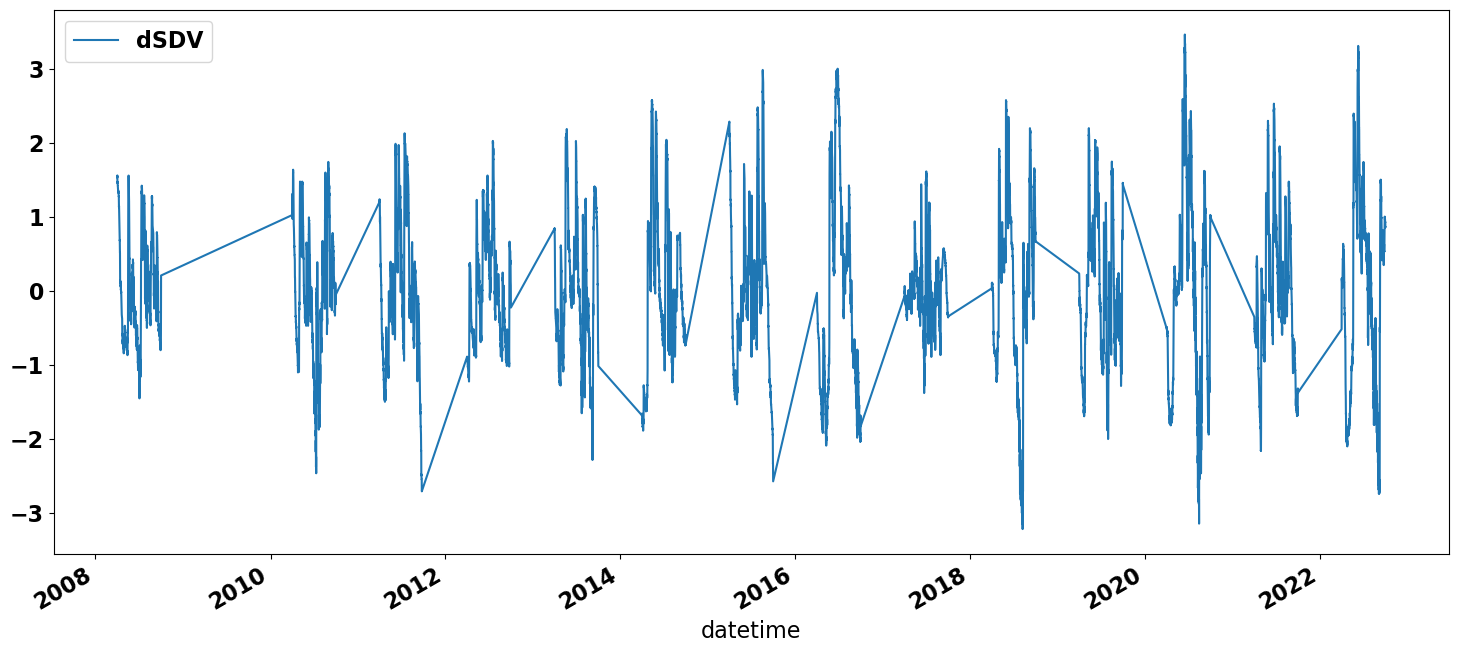

In [396]:
dendro_I5_seq.plot()

<Axes: xlabel='datetime'>

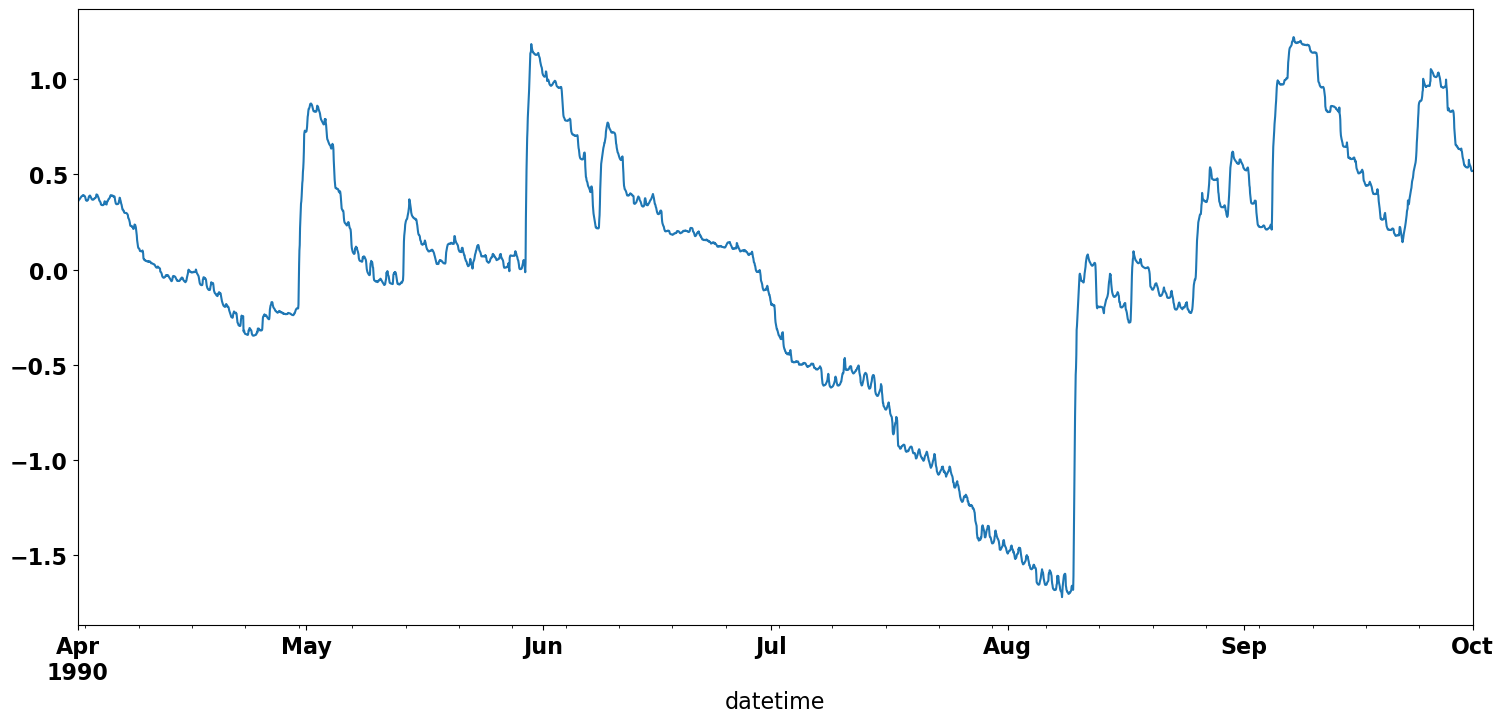

In [192]:
from scipy.signal import detrend

x=detrend(df_dendro_K7.loc[:,'jr2018'], type='linear')
test=pd.Series(data = x, index=df_dendro_I5.loc[:,'jr2018'].index)
test.plot()

<Axes: xlabel='datetime'>

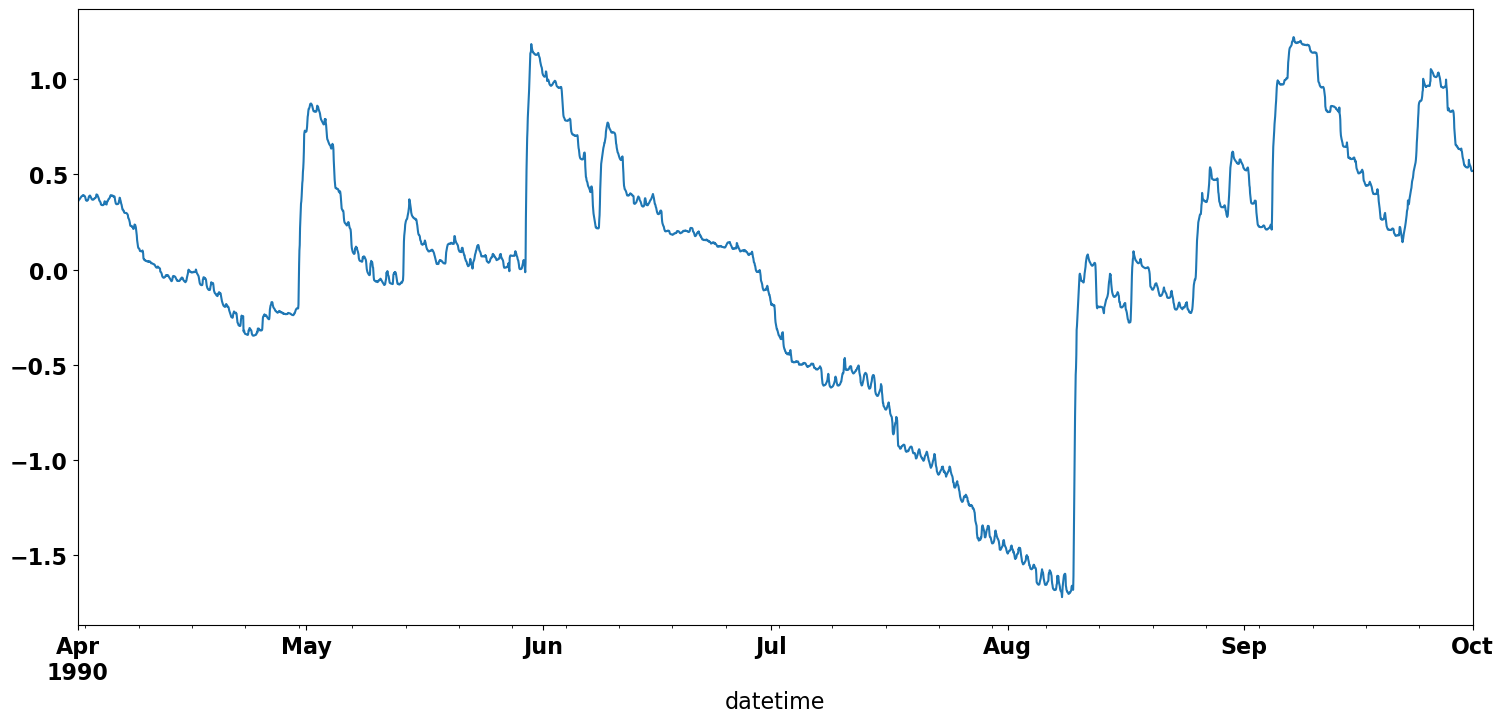

In [192]:
from scipy.signal import detrend

x=detrend(df_dendro_K8.loc[:,'jr2018'], type='linear')
test=pd.Series(data = x, index=df_dendro_I5.loc[:,'jr2018'].index)
test.plot()

## applying FFT to lin detrended data

In [28]:
len(x_d_linear)

4393

In [29]:
len([1]*4393)

4393

In [30]:
N = len(x_d_linear) #(measurements)
#T = K #(1 hour)
#t = #index of what to proces
T_intervals =  np.array([1.0]*4393) #since I know all my values are 1 hour apart and I'm missing none, just create an array of 1's #normally calculated with np.diff(t)
f = fftfreq(N, T_intervals)
f

array([ 0.        ,  0.00022763,  0.00045527, ..., -0.0006829 ,
       -0.00045527, -0.00022763])

In [31]:
x = x_d_linear #array of values
#x1_FFT = fft(x) #time series not needed here

#example: To set the step for frequencies to one year, determine how many samples represent this duration (12), then take the inverse for parameter d
freqs = fft.rfftfreq(n=N, d=1/12)  #rfftfreq()
#applied to my situation:  N = 4393 , I want my step to be 1 hour, so d=1/1
freqs = fft.rfftfreq(n=N, d=1)  #rfftfreq()


#when we go to plot, we need T_intervals
#plt.plot(f[:N//2],np.abs(x1_FFT[:N//2]))
plt.plot(f,np.abs(x1_FFT))

AttributeError: 'uarray._Function' object has no attribute 'rfftfreq'

In [32]:
import numpy as np
import pandas as pd
import scipy.fft as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# Read values, select columns, convert to numpy array

t = df_I5.loc[:,'jr2018'].reset_index().index
vals = df_I5.loc[:,'jr2018'].values



df = df_I5.loc[:,['jr2018']]
#df = df.take([3, 1, 4], axis=1)
data = df.to_numpy()

In [33]:

#np.array(hour)

In [34]:
#f=sf.rfft(data.flatten())
#s=pd.Series(data.flatten())
#pd.Series(sf.rfft(data))#.plot()

C:\Users\feder\AppData\Local\Temp\ipykernel_7448\1611806540.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{1/tick:.1f}' if tick!=0 else '$\infty$' for tick in ticks])


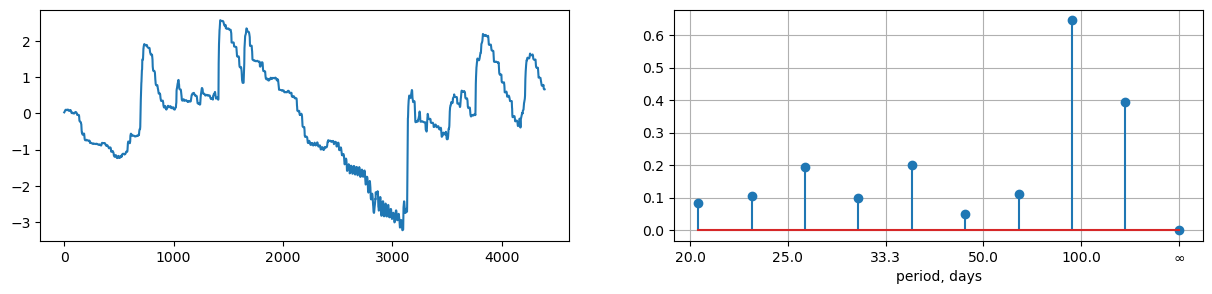

In [35]:
# Sort by date, extract columns in invidual views, remove DC offset
#data = data[data[:,0].argsort()]
#year = data[:,1]
#spots = data[:,2]
#spots = spots - spots.mean()

hour = np.array([i for i in range(0,4393)])
detr_vals = detrend(vals, type='linear')
#do a linregrss to find out slope


# Get positive DFT of AQI
#N = year.shape[0]
N=4393 #1 growth season is 4393 hours
X = sf.rfft(detr_vals) / N
freqs = sf.rfftfreq(n=N, d=1/24) # unit of interest is day. 24 hours in day => d = 1/24 

# Plot signal
fig, axes = plt.subplots(figsize=(15,3), ncols=2)
ax=axes[0]
ax.plot(hour, detr_vals)
ax.xaxis.set_major_locator(tck.MultipleLocator(1000))
#ax.grid()

# Plot DFT
ax=axes[1]
extent = 10#N
ax.set_xlabel('period, days')
ax.stem(freqs[:extent], abs(X[:extent]))
#ax.stem(freqs[:extent], abs(X[:extent]))
ticks = ax.get_xticks()
ax.set_xticklabels([f'{1/tick:.1f}' if tick!=0 else '$\infty$' for tick in ticks])
ax.invert_xaxis()
ax.grid()

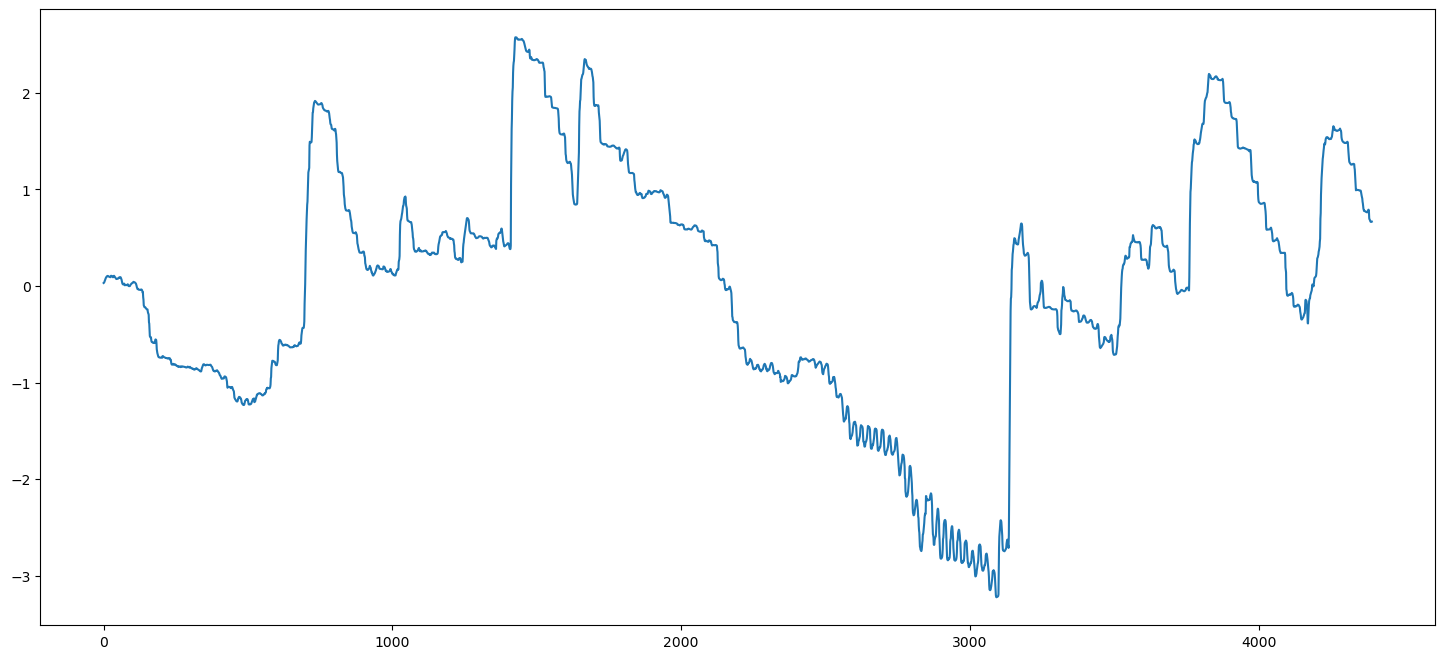

In [36]:
detr_vals = detrend(vals, type='linear')
plt.plot(detr_vals)

In [37]:
## try again
from scipy.signal import butter, lfilter, freqz
from scipy.signal import freqs

In [38]:
#fs
#nyq
(1/24)*0.5

0.020833333333333332

In [39]:
#cutoff aka Wn
(1/22)

0.045454545454545456

In [40]:
fs has to be bigger than 2*Wn

SyntaxError: invalid syntax (1113905867.py, line 1)

nyq:  0.041666666666666664
cutoff:  0.03333333333333333
normalcutoff=cut/nyq=  0.8


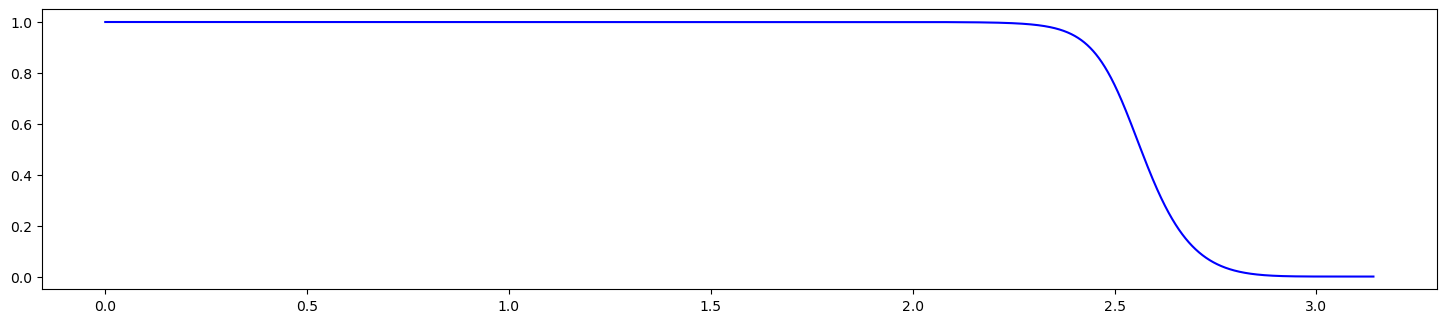

In [41]:
data = detrend(vals, type='linear')

def butter_lowpass(cutOff, fs, order = 5):
    nyq = 0.5 * fs
    print('nyq: ',nyq)
    normalCutoff = cutOff /nyq
    print('cutoff: ',cutOff)
    print('normalcutoff=cut/nyq= ', normalCutoff)
    b,a = butter(order, normalCutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b,a = butter_lowpass(cutOff, fs, order=order)
    y=lfilter(b,a,data)
    return y
cutOff = 1/30 #cutoff freq in rad/s
fs = 1/12 #sampling frequency in rad/s
order = 6 #order of filter

b,a = butter_lowpass(cutOff, fs, order)

w,h = freqz(b,a, worN=8000)
plt.subplot(2,1,1)
#y= butter_lowpass_filter(data, cutOff, fs, order)
plt.plot(w, np.abs(h),'b')

In [42]:
## again
## following along a tutorial  https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/filtering_in_time.html
T = np.squeeze(np.genfromtxt('../TLT_19792019.csv',delimiter=','))

# Extract Dec. 1979 - November 2019 and just extract last column (temperature data)
T = T[11:-1,2]

# Alternative way to compute the seasonal averages
T_seasons = np.mean(T.reshape(-1, 3), axis=1)
T_seasons

array([ 0.0288    ,  0.03633333,  0.02556667,  0.00416667,  0.03743333,
        0.0044    , -0.04543333, -0.07823333, -0.0687    , -0.2117    ,
       -0.23886667, -0.22876667, -0.00713333,  0.15673333,  0.01056667,
       -0.00783333, -0.23956667, -0.15206667, -0.20393333, -0.30713333,
       -0.28023333, -0.33713333, -0.35956667, -0.2502    , -0.1587    ,
       -0.135     , -0.23466667, -0.1989    ,  0.10693333,  0.0177    ,
        0.07943333,  0.13026667,  0.23083333,  0.13833333,  0.11663333,
        0.0624    , -0.2146    , -0.15216667, -0.11553333, -0.01756667,
       -0.0442    ,  0.06686667,  0.05043333,  0.13243333,  0.16573333,
        0.20363333,  0.23493333, -0.0456    , -0.0985    , -0.08746667,
       -0.26316667, -0.1853    , -0.206     , -0.18446667, -0.02873333,
       -0.08616667,  0.0451    , -0.01616667,  0.09073333,  0.02913333,
        0.1511    ,  0.15603333,  0.2183    ,  0.2531    ,  0.00616667,
        0.04736667,  0.05646667,  0.16643333,  0.01126667, -0.02

Text(0.5, 1.0, 'Seasonal TLT Time Series (1980-2019)')

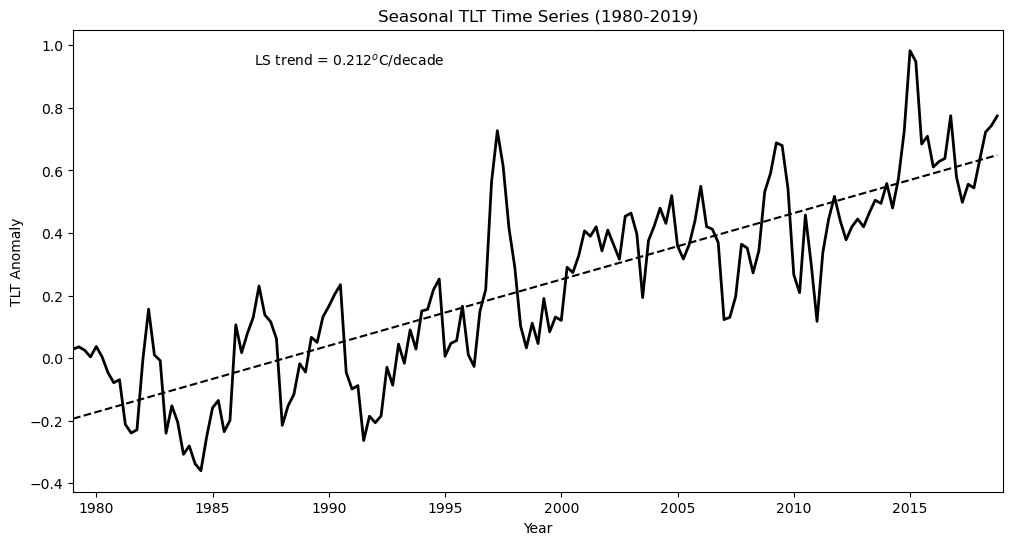

In [43]:
# Create time index for plotting and for regression
time = np.arange(0,len(T_seasons),1)

# Plot the data (update to Fig. 3 of Santer et al. 2000)
plt.figure(figsize=(12,6))

# plot time series
plt.plot(time,T_seasons,'k',linewidth=2)

# calculate best-fit line
a = np.polyfit(time,T_seasons,1)
T_hat = np.polyval(a,time)

# plot best-fit line
plt.plot(time,T_hat,'k',linestyle='--')

# ticks, labels, etc.
plt.xticks(np.arange(4,len(time),20),["1980","1985","1990","1995","2000","2005","2010","2015"])
plt.xlim(0,len(time)) 
plt.text(0.4, 0.925,'LS trend = ' + str(np.round(a[0]*40,3)) + '$^o$C/decade', ha='right', 
         transform=plt.gca().transAxes, color = 'k') #we multiply by 40 because our unit of time is seasons but we
                                                        #want to report the trend in deg C per decade
plt.ylabel("TLT Anomaly")
plt.xlabel("Year")
plt.title("Seasonal TLT Time Series (1980-2019)")

In [44]:
## same tutorial, moving on to FFT

# load packages
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import matplotlib as mpl
import pickle
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

In [45]:
# read .pickle file
#infile = open('Ps.pickle','rb')
#ps_anom,ps = pickle.load(infile)
#infile.close()

ps_anom=detr_vals
ps = vals

## develop fft

Text(0.5, 1.0, 'Anomalous SDV')

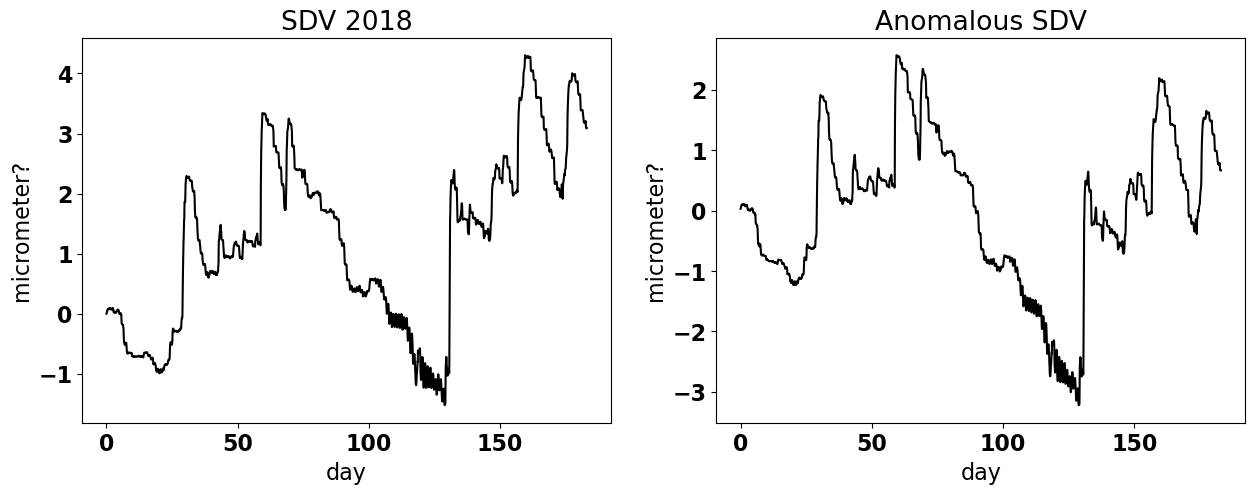

In [46]:
# plot climatology and anomaly
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,len(ps))/24,ps,'-k')
plt.ylabel('micrometer?')
plt.xlabel('day')
#plt.xlim(0,14)
#plt.xlim(124,130)
plt.title('SDV 2018')

plt.subplot(1,2,2)
plt.plot(np.arange(0,len(ps))/24,ps_anom,'-k')
plt.ylabel('micrometer?')
plt.xlabel('day')
#plt.xlim(0,14)
#plt.xlim(124,130)
#plt.xlim(2500,3200)
plt.title('Anomalous SDV')

In [414]:
# calculate discrete fourier transform of X
Z = np.fft.fft(ps_anom)

In [397]:
# calculate discrete fourier transform of X
#Z = np.fft.rfft(ps_anom,28)

In [415]:
# to get the right variance, we need to normalize Z by N.
Zfft = Z/len(ps_anom)

# next, we calculate the power: the square of absolute value of complex fourier transform
Ck2 = np.abs(Zfft)**2

In [416]:
# compute power over half the FFT output
Ck2 = 2*np.abs(Zfft[0:int(len(ps_anom)/2)+1])**2

In [419]:
# checking the variance compared to the total variance in our spectrum
# i.e, checking Parseval's Theorem

# actual variance of your data
var_actual = np.var(ps_anom)

# variance in your spectrum, it should be close to the actual variance of your data
var_spectrum = np.sum(Ck2)

print(np.round(var_actual,5), np.round(var_spectrum,5))

1.60601 1.60601


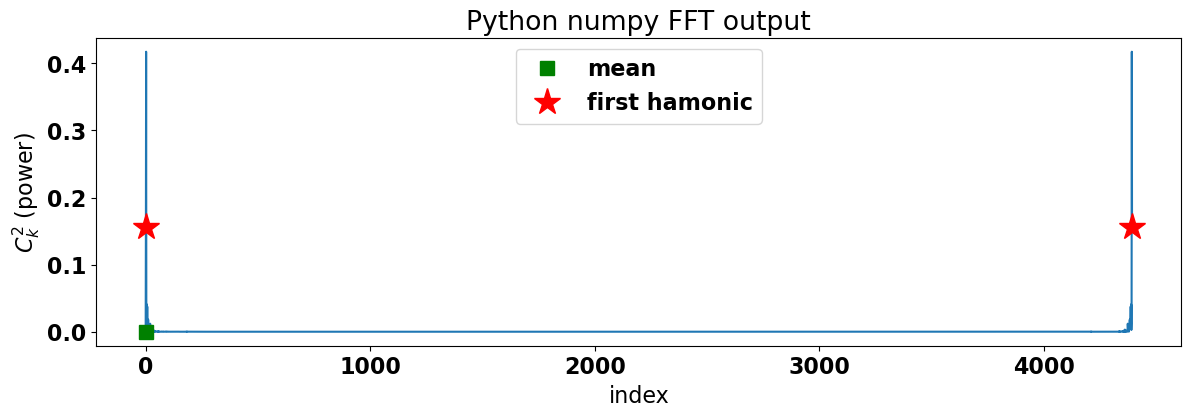

In [420]:
# plot the FFT power

plt.figure(figsize=(14,4))

# plot blue line
plt.plot(np.arange(0,np.size(Zfft)),np.abs(Zfft)**2)

# plot markers
plt.plot(0,np.abs(Zfft[0])**2.,'sg',markersize=10,label='mean')
plt.plot(1,np.abs(Zfft[1])**2.,'*r',markersize=20,label='first hamonic')
plt.plot(np.size(Zfft)-1,np.abs(Zfft[-1])**2.,'*r',markersize=20)

plt.xlabel('index')
plt.ylabel('$C_k^2$ (power)')

plt.title('Python numpy FFT output')
plt.legend()

#plt.ylim(-.5,4.5)
#plt.xlim(-5,365+5)
#plt.xlim(-1,30)

Text(0.5, 1.0, 'Normalized Discrete Power Spectrum')

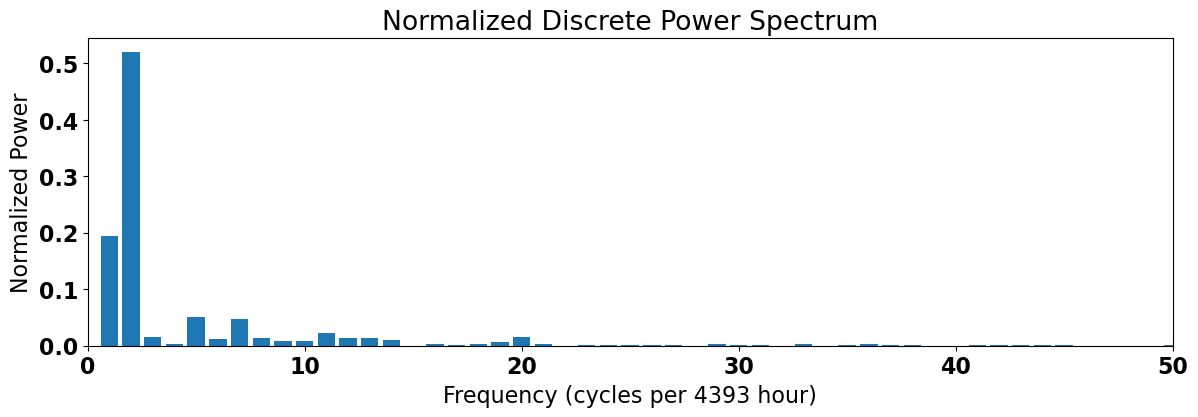

In [421]:
# combine symmetric parts of the FFT and plot the power spectrum as a function of frequency

# create frequency variable for plotting
freq = np.arange(0,int(len(ps_anom)/2)+1)

# plot power just up to freq = 50 cycles per year
plt.figure(figsize=(14,4))
plt.bar(freq,Ck2/np.sum(Ck2))
plt.ylabel('Normalized Power')
plt.xlabel('Frequency (cycles per 4393 hour)')
plt.xlim(0,50)
plt.title('Normalized Discrete Power Spectrum')

In [422]:
#in the above plot we have frequency as cycles per year (data is 1 value per day) for up to 50 cycles per year
# meaning the graph shows cycles that repeat 356/50 = 7.12 intervals in a year (around half of 12, so every half-month)

#what I am interested in is cycles per growthseason (01-04-XXXX 00:00 to 01-10-XXXX 00:00) or 184 days per year, or  4392 hours (actually 4393 h because of the midnight value of 1 october. btw september has 30 days.
#because I have around half the days, if I had daily values, I'd have 25 cycles per growth season = more or less 7 periods per year. Since I have 24x more data, instead it's 600 cycles per year (comes out to the same 7 intervals per year.)


In [454]:
# 4392 (4393) hours = 184 days

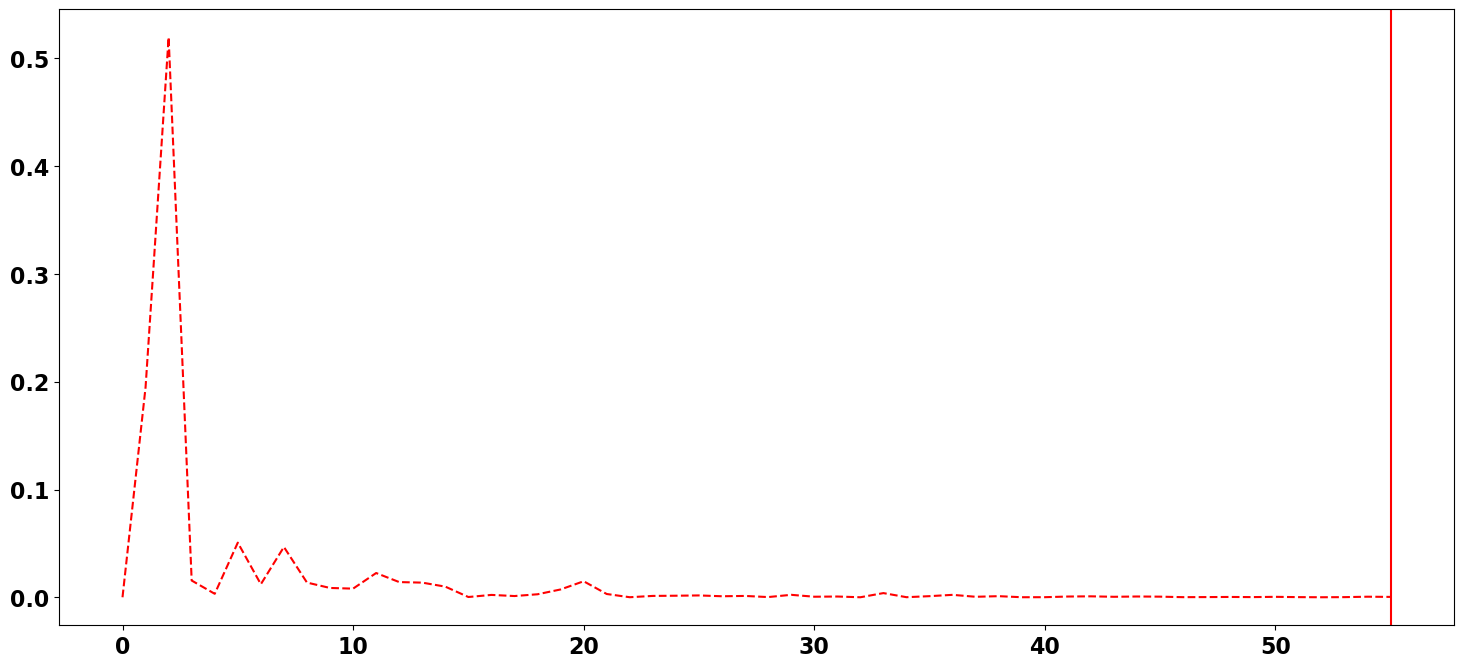

In [446]:
# plot spectrum and how we will only retain the first 3 harmonics (which includes the mean)

N=56

# plot vertical line showing the frequency cut-off
plt.axvline(freq[N-1],color ='r', linewidth = 1.5)

# compute normalized power
A = Ck2/np.sum(Ck2)

# set power to zero at frequencies above 2 cycles per year
A[N::] = 0.

# plot power for lowest frequencies
plt.plot(freq[0:N],A[0:N],'--r')

In [447]:
# low-pass filter: retain only the mean and the first two harmonics, set all other frequencies to zero
# Note that we use the unnormalized FFT output here as this is what we want to plug into our inverse fft.
Z_lp = np.copy(Z)
Z_lp[N:-(N-1):] = 0.0  # we have to set both the positive and negative frequencies to zero

In [448]:
# apply inverse fourier transform to convert back to time domain (just want the real part)
ps_anom_lp = np.real(np.fft.ifft(Z_lp))

In [449]:
# high-pass filter: remove everything that we didn't remove before
Z_hp = np.copy(Z)
Z_hp[0:N] = 0
Z_hp[-(N-1):] = 0

# apply inverse fourier transform to convert back to time domain
ps_anom_hp = np.real(np.fft.ifft(Z_hp))

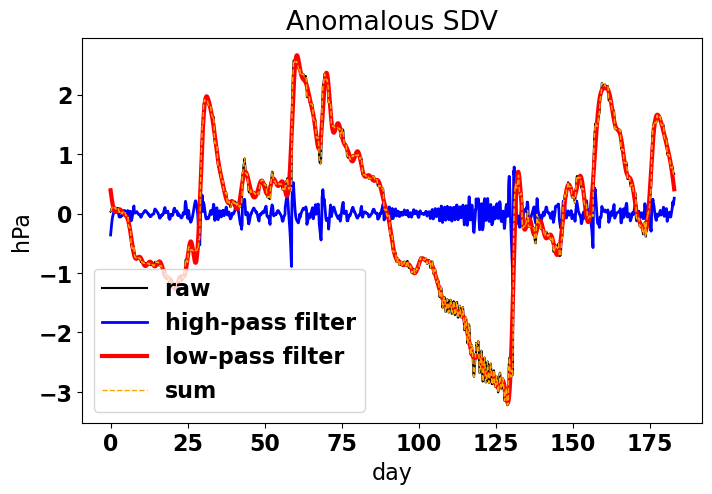

In [453]:
# plot climatological SLP anomaly
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(ps_anom))/24,ps_anom,'-k',label='raw')
plt.ylabel('hPa')
plt.xlabel('day')
#plt.xlim(124,130)
plt.title('Anomalous SDV')

# plot high-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_hp ,'-b',linewidth = 2, label='high-pass filter')

#  plot low-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp ,'-r',linewidth = 3, label ='low-pass filter')

# plot sum of low pass and high pass
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp + ps_anom_hp  ,'--',color = 'orange',linewidth = 1, label='sum')

plt.legend()

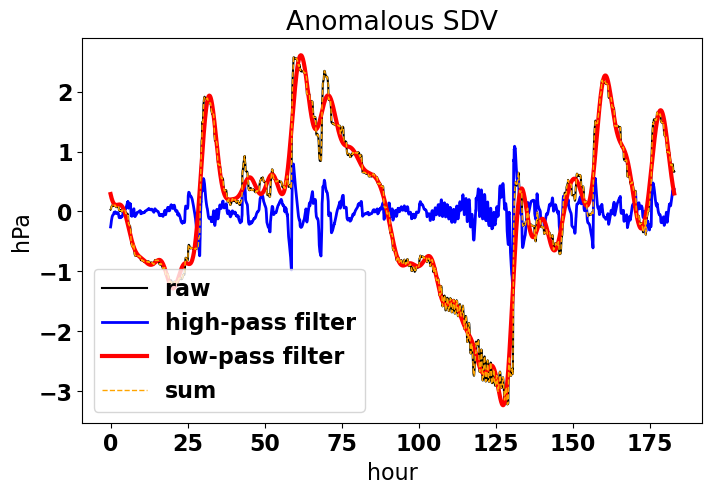

In [66]:
# plot climatological SLP anomaly
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(ps_anom))/24,ps_anom,'-k',label='raw')
plt.ylabel('hPa')
plt.xlabel('hour')
#plt.xlim(124,130)
plt.title('Anomalous SDV')

# plot high-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_hp ,'-b',linewidth = 2, label='high-pass filter')

#  plot low-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp ,'-r',linewidth = 3, label ='low-pass filter')

# plot sum of low pass and high pass
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp + ps_anom_hp  ,'--',color = 'orange',linewidth = 1, label='sum')

plt.legend()

## develop fft

## apply fft

In [456]:
def fft_hl_pass(ps_anom,N):
    # calculate discrete fourier transform of X
    #N=56 #window size
    Z = np.fft.fft(ps_anom)
    # to get the right variance, we need to normalize Z by N.
    Zfft = Z/len(ps_anom)
    # next, we calculate the power: the square of absolute value of complex fourier transform
    Ck2 = np.abs(Zfft)**2
    # compute power over half the FFT output
    Ck2 = 2*np.abs(Zfft[0:int(len(ps_anom)/2)+1])**2
    # actual variance of your data
    #var_actual = np.var(ps_anom)
    # variance in your spectrum, it should be close to the actual variance of your data
    #var_spectrum = np.sum(Ck2)
    #freq = np.arange(0,int(len(ps_anom)/2)+1)
    # compute normalized power
    A = Ck2/np.sum(Ck2)
    # set power to zero at frequencies above 2 cycles per year
    A[N::] = 0.
    # low-pass filter: retain only the mean and the first two harmonics, set all other frequencies to zero
    # Note that we use the unnormalized FFT output here as this is what we want to plug into our inverse fft.
    Z_lp = np.copy(Z)
    Z_lp[N:-(N-1):] = 0.0  # we have to set both the positive and negative frequencies to zero
    # apply inverse fourier transform to convert back to time domain (just want the real part)
    ps_anom_lp = np.real(np.fft.ifft(Z_lp))
    # high-pass filter: remove everything that we didn't remove before
    Z_hp = np.copy(Z)
    Z_hp[0:N] = 0
    Z_hp[-(N-1):] = 0
    # apply inverse fourier transform to convert back to time domain
    ps_anom_hp = np.real(np.fft.ifft(Z_hp))
    return ps_anom_lp, ps_anom_hp

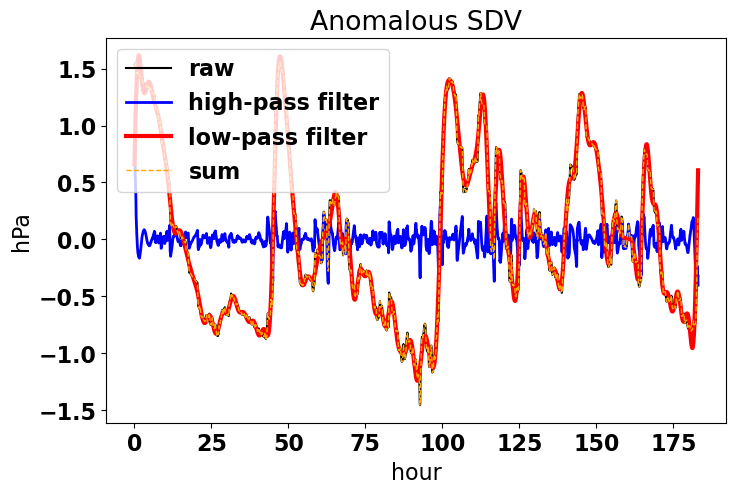

In [469]:
ps_anom = dendro_I5_seq.loc['2008-04-01':'2008-10-01','dSDV']
ps_anom_lp, ps_anom_hp = fft_hl_pass(ps_anom)
# plot climatological SLP anomaly
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(ps_anom))/24,ps_anom,'-k',label='raw')
plt.ylabel('hPa')
plt.xlabel('hour')
#plt.xlim(124,130)
plt.title('Anomalous SDV')

# plot high-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_hp ,'-b',linewidth = 2, label='high-pass filter')

#  plot low-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp ,'-r',linewidth = 3, label ='low-pass filter')

# plot sum of low pass and high pass
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp + ps_anom_hp  ,'--',color = 'orange',linewidth = 1, label='sum')

plt.legend()

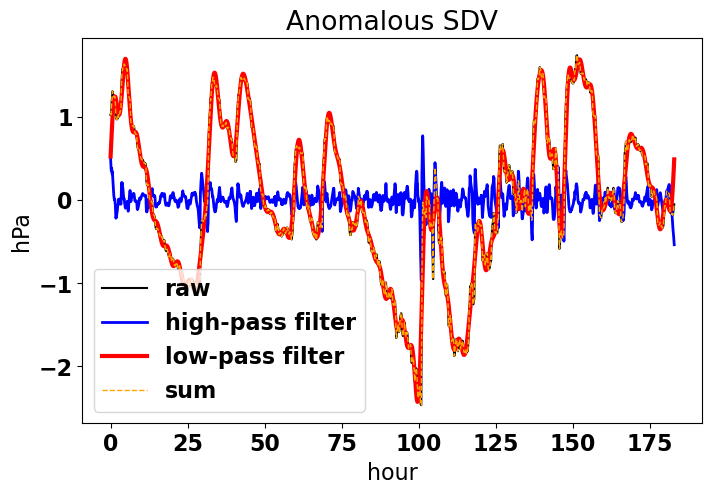

In [470]:
ps_anom = dendro_I5_seq.loc['2010-04-01':'2010-10-01','dSDV']
ps_anom_lp, ps_anom_hp = fft_hl_pass(ps_anom)
# plot climatological SLP anomaly
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(ps_anom))/24,ps_anom,'-k',label='raw')
plt.ylabel('hPa')
plt.xlabel('hour')
#plt.xlim(124,130)
plt.title('Anomalous SDV')

# plot high-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_hp ,'-b',linewidth = 2, label='high-pass filter')

#  plot low-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp ,'-r',linewidth = 3, label ='low-pass filter')

# plot sum of low pass and high pass
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp + ps_anom_hp  ,'--',color = 'orange',linewidth = 1, label='sum')

plt.legend()

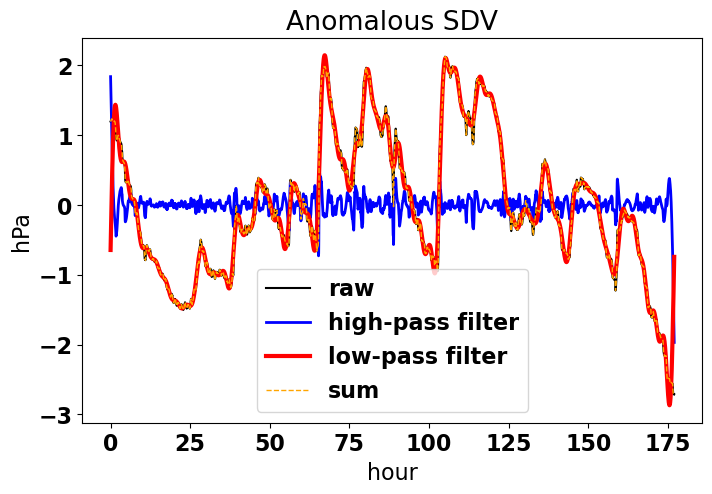

In [471]:
 ps_anom = dendro_I5_seq.loc['2011-04-01':'2011-10-01','dSDV']
ps_anom_lp, ps_anom_hp = fft_hl_pass(ps_anom)
# plot climatological SLP anomaly
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(ps_anom))/24,ps_anom,'-k',label='raw')
plt.ylabel('hPa')
plt.xlabel('hour')
#plt.xlim(124,130)
plt.title('Anomalous SDV')

# plot high-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_hp ,'-b',linewidth = 2, label='high-pass filter')

#  plot low-pass time series
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp ,'-r',linewidth = 3, label ='low-pass filter')

# plot sum of low pass and high pass
plt.plot(np.arange(0,len(ps_anom))/24, ps_anom_lp + ps_anom_hp  ,'--',color = 'orange',linewidth = 1, label='sum')

plt.legend()